<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Final Project 2</strong></font></h1>

------------------------------------------------

HACKTIV8 - PYTHON FOR DATA SCIENCE

------------------------------------------------

# Kelompok 2 - PYTN KS 019

1. Nur Ishmawati
2. Dyah Ayu Kusuma Wardhani
3. ChristopherBernard S. H
4. Ahmat Zainul M


# __A. INTRODUCTION__
-----------------

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

Database ini (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data) Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

Metode pendekatan model statistik dan machine learning untuk melakukan prediksi keselamatan pasien dari penyakit jantung akan dilakukan pada project ini. Metode yang digunakan untuk memprekdiksi keselamatan pasien dari penyakit jantung adalah Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes.

Objektif yang ingin dicapai dari pemodelan pada final project 2 ini adalah:

- Membuat pemodelan machine learning untuk memprediksi keselamatan pasien dari penyakit jantung berdasarkan faktor-faktor yang mempengaruhinya menggunakan 6 model metode (Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes).
- Mengetahui model terbaik dari ke 6 model yang dibuat.

# __B. IMPORT LIBRARY__
----------------------------

In [1]:
# Import Library Dataframe
import pandas as pd
import numpy as np

# Import Library untuk Visualisasi
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import scipy
from scipy.stats.mstats import winsorize
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# Import Library untuk Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
import missingno as msno

# Import Library untuk Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# Import Library untuk ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# C. DATA LOADING
-------------------

## 1. Memanggil Dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

# Melihat 5 data paling atas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Melihat 5 data terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**``Keterangan dataset:``**

Database ini terdiri dari ``13 atribut`` yang memiliki ``299 baris``. Dimana memuat data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang akan diprediksi.
1. ``age`` - umur pasien
2. ``anaemia`` - apakah ada pengurangan haemoglobin
3. ``creatinine_phosphokinase`` - level enzim CPK dalam mcg/L
4. ``diabetes`` - apakah pasien punya riwayat diabetes
5. ``ejection_fraction`` - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. ``high_blood_pressure`` - apakah pasien punya darah tinggi
7. ``platelets`` - jumlah platelet di darah dalam kiloplatelets/mL
8. ``serum_creatinine`` - level serum creatinine di darah dalam mg/dL
9. ``serum_sodium`` - level serum sodium di darah dalam mEq/L
10. ``sex`` - apakah pasien pria atau wanita
11. ``smoking`` - apakah pasien merokok
12. ``time`` - waktu dalam hari untuk follow-up
13. ``DEATH_EVENT`` - apakah pasien sudah meninggal saat waktu follow-up

## 2. Melihat Jumlah Baris & Kolom

In [5]:
df.shape

(299, 13)

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Dataset ini terdiri dari 13 atribut yang memiliki 299 baris.

## 3. Melihat Info dan Tipe Data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
# Mengecek tipe data
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Dataset ini terdiri dari 13 atribut yang memiliki 299 baris, dengan ``tipe data numerik, yaitu float dan integer``.

In [9]:
# Melihat data unik
df.nunique().sort_values(ascending=True)

anaemia                       2
diabetes                      2
high_blood_pressure           2
sex                           2
smoking                       2
DEATH_EVENT                   2
ejection_fraction            17
serum_sodium                 27
serum_creatinine             40
age                          47
time                        148
platelets                   176
creatinine_phosphokinase    208
dtype: int64

**``Keterangan``**
- ``Sex`` - Gender of patient Male =1, Female =0
- ``Age`` - Age of patient
- ``Diabetes`` - 0 = No, 1 = Yes
- ``Anaemia`` - 0 = No, 1 = Yes
- ``High_blood_pressure`` - 0 = No, 1 = Yes
- ``Smoking`` - 0 = No, 1 = Yes
- ``DEATH_EVENT`` - 0 = No, 1 = Yes

## 4. Melihat Data Kategorik dan Numerik

In [10]:
# Mengecek kolom kategori
categorical_col = [col for col in df.columns if df[col].dtypes =='O']

print('Terdapat {} kolom kategori'.format(len(categorical_col)))
print('Kolom kategori tersebut yaitu:', categorical_col)

Terdapat 0 kolom kategori
Kolom kategori tersebut yaitu: []


In [11]:
# Mengecek kolom numerik
numerical_col = [col for col in df.columns if df[col].dtypes !='O']

print('Terdapat {} kolom numerik'.format(len(numerical_col)))
print('Kolom numerik tersebut yaitu:', numerical_col)

Terdapat 13 kolom numerik
Kolom numerik tersebut yaitu: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


# D. DATA CLEANING
------------------------
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.


## 1. Mengecek Missing Value
    Mengecek missing value pada setiap kolom

In [12]:
#Mengecek apakah terdapat missing value
df.isnull().values.any()    

False

In [13]:
# Memeriksa kolom yang terdapat missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Pada dataframe tidak terdapat missing value pada setiap kolom

## 2. Melihat Distribusi Kolom Numerik

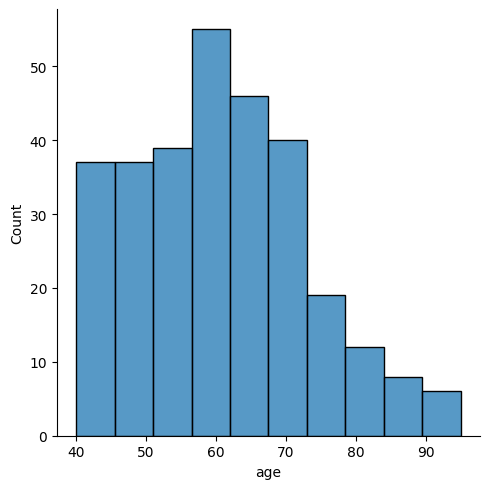

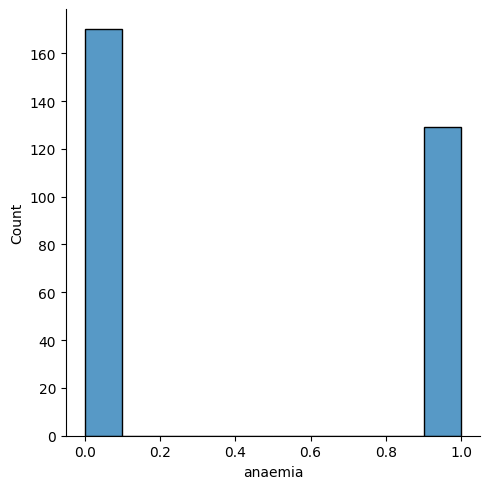

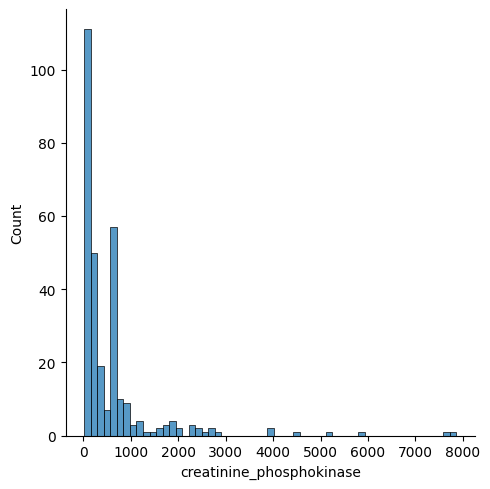

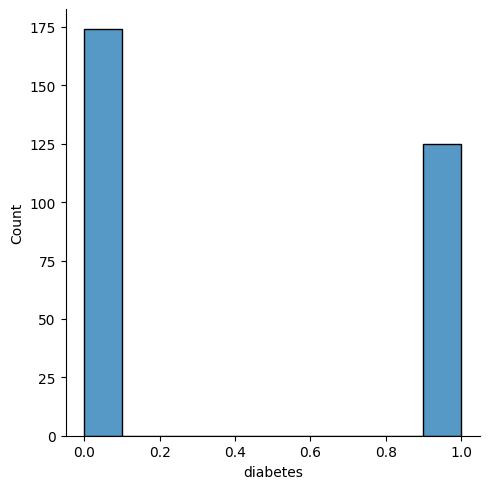

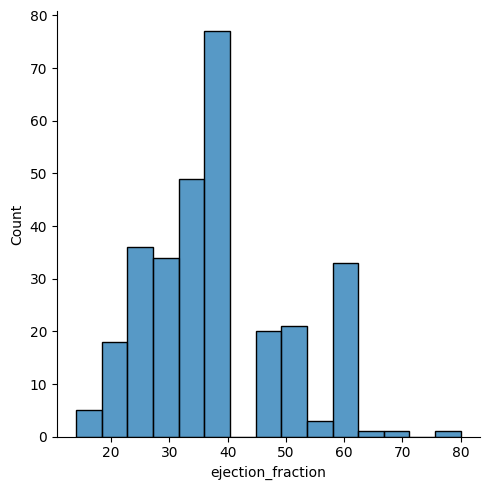

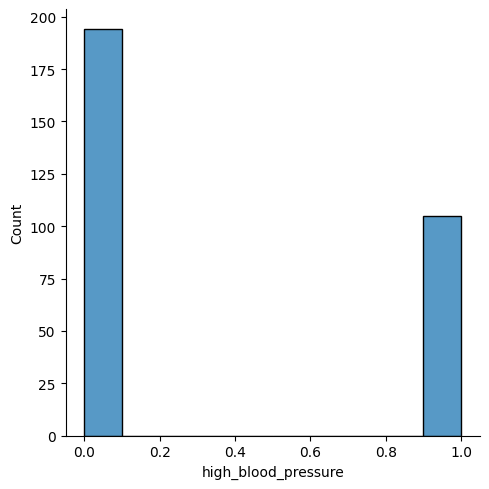

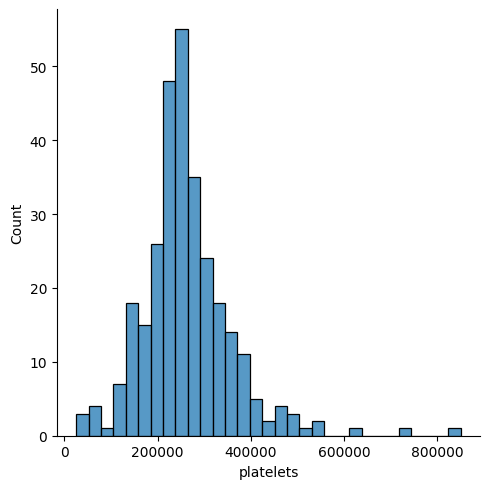

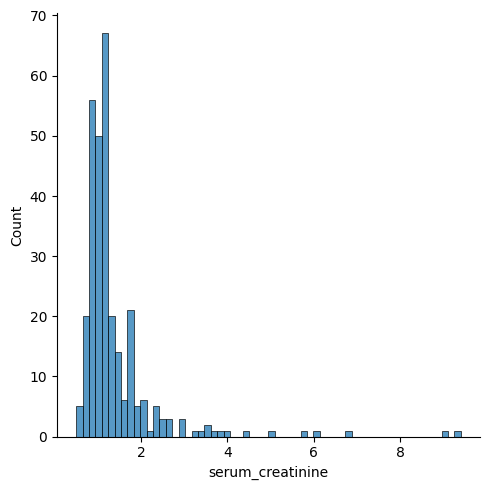

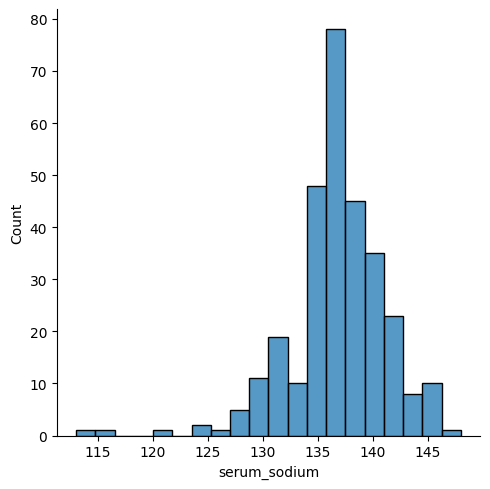

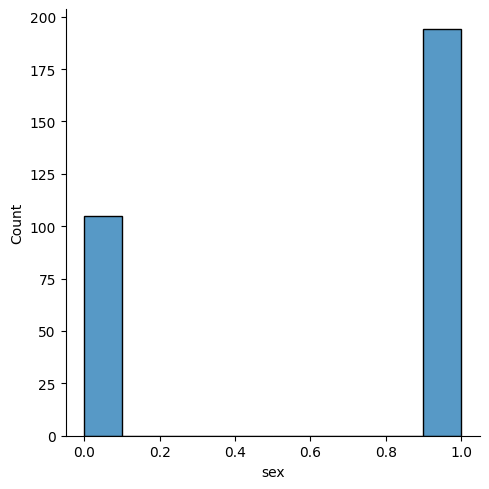

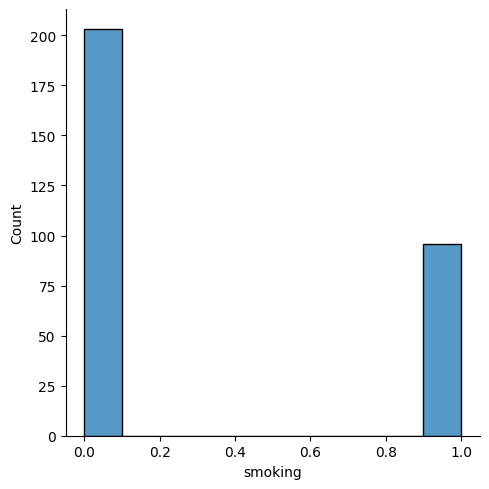

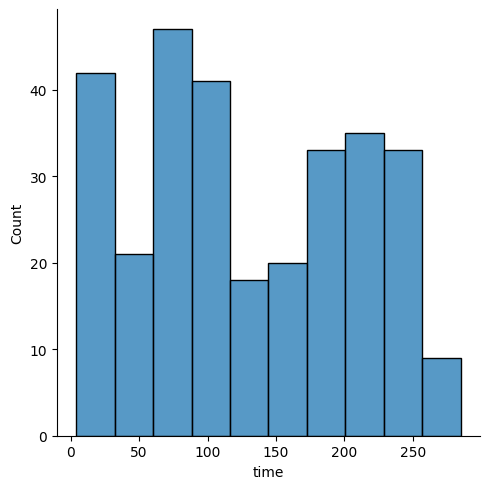

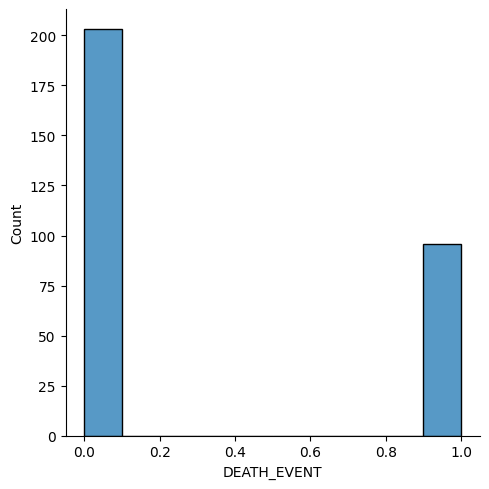

In [14]:
# Menampilkan visualisasi distribusi normal dari kolom numerik
for i in numerical_col:
    sns.displot(df[i])
    plt.show()

Berdasarkan visualisasi di atas terlihat bahwa data masih belum berdistribusi normal dikarenakan masih banyak terdapat data yang null. Sehingga diperlukan untuk mengisinya dengan data mean/median dari setiap kolom yang null. Jika terdapat skewness maka diperlukan pengisian nilai yang kosong pada kolom dengan median.

## 3. Mengecek Outlier Kolom Numerik

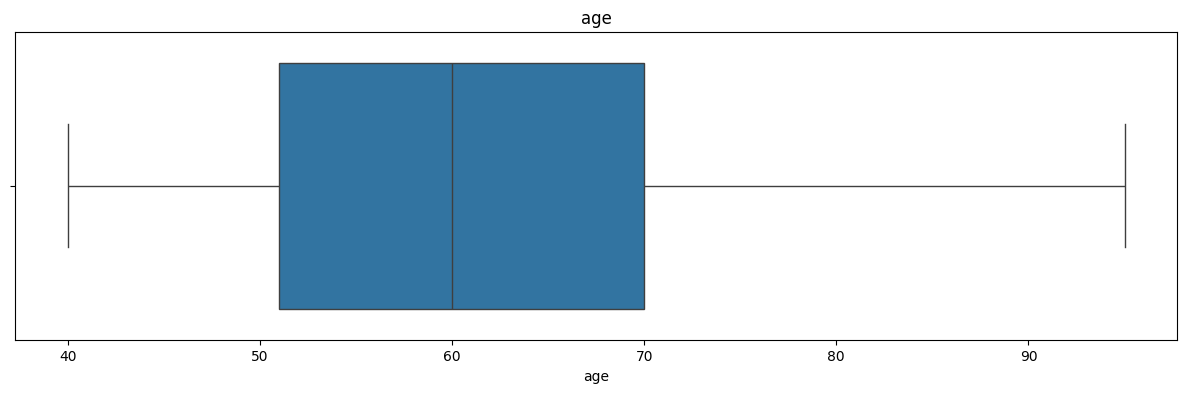

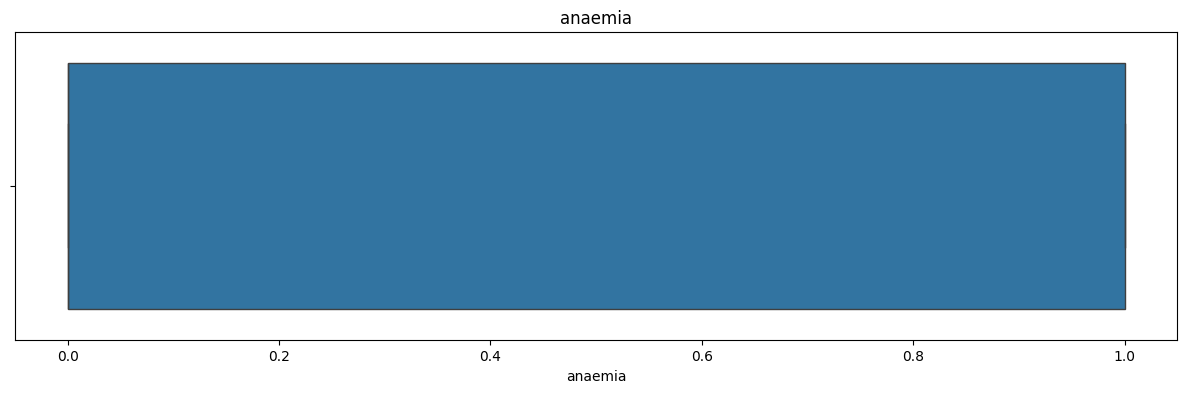

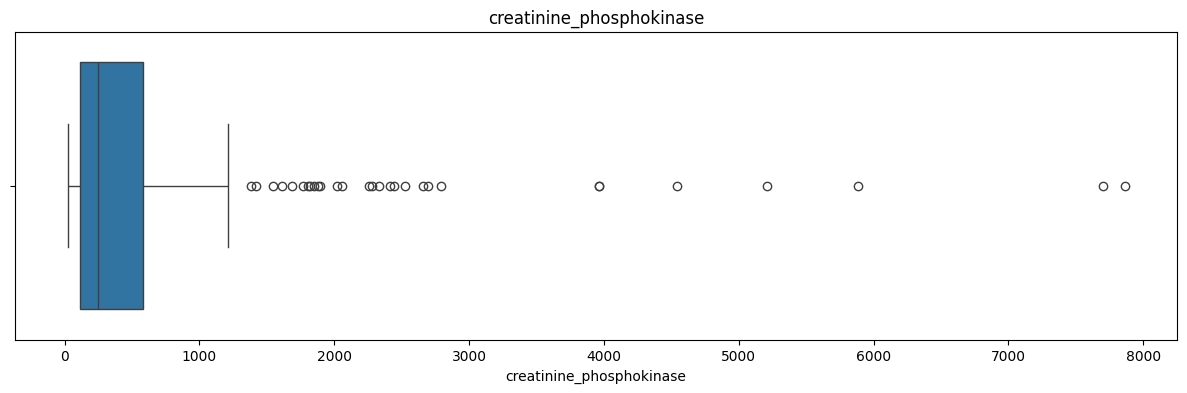

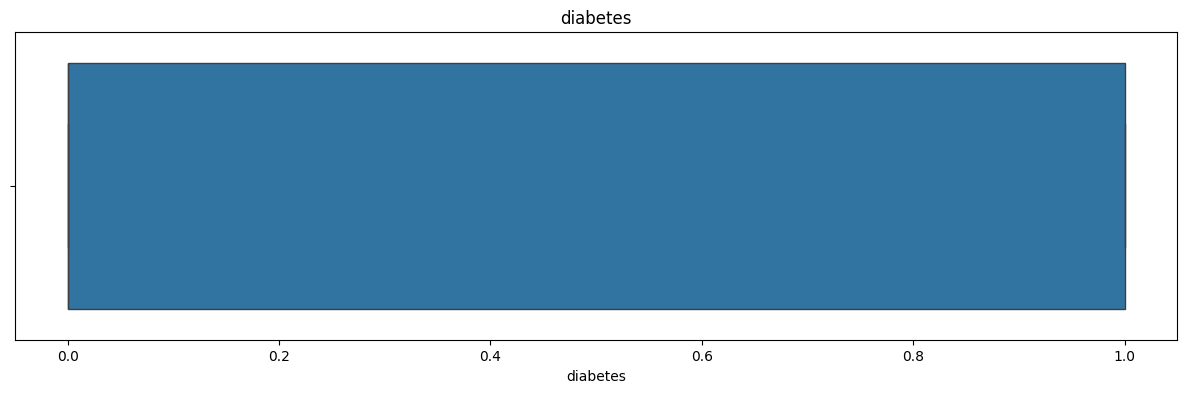

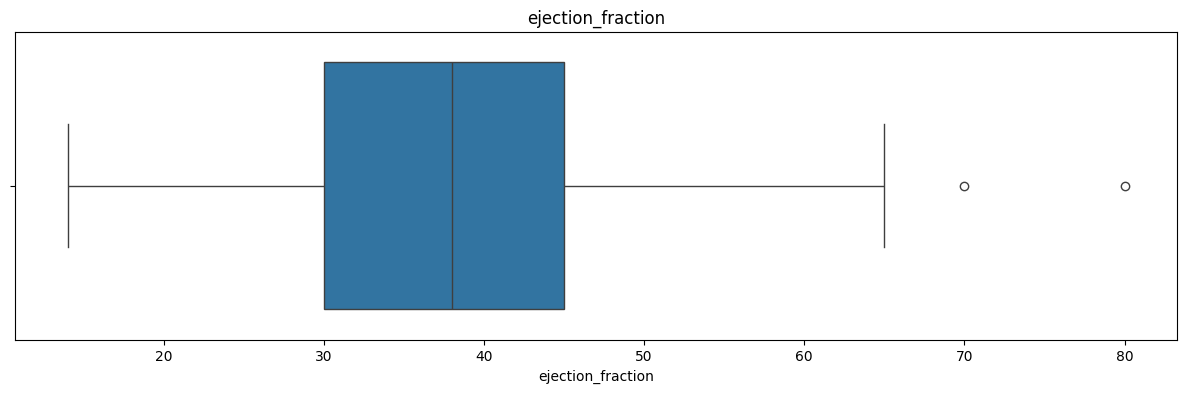

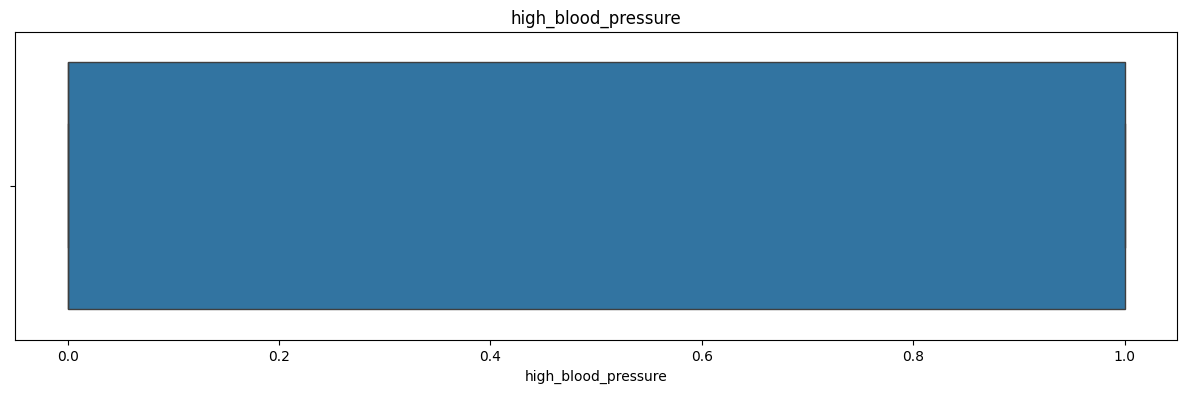

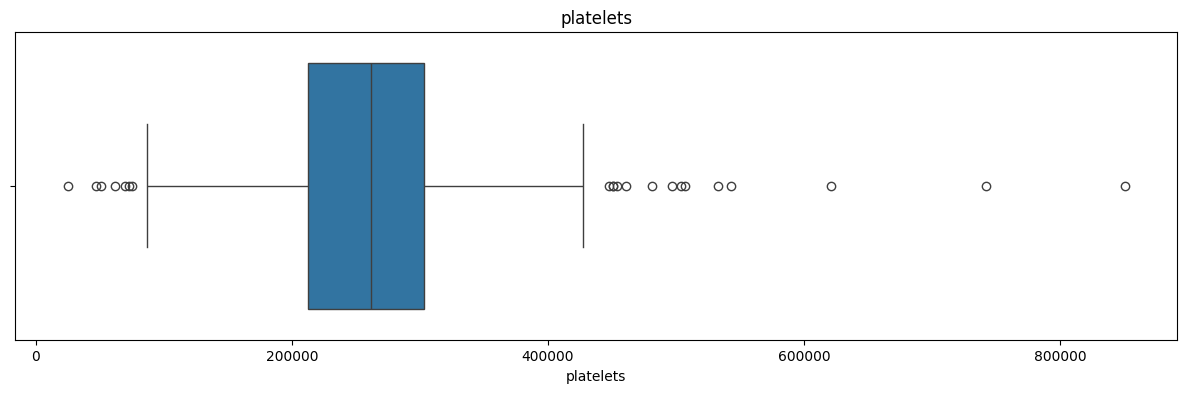

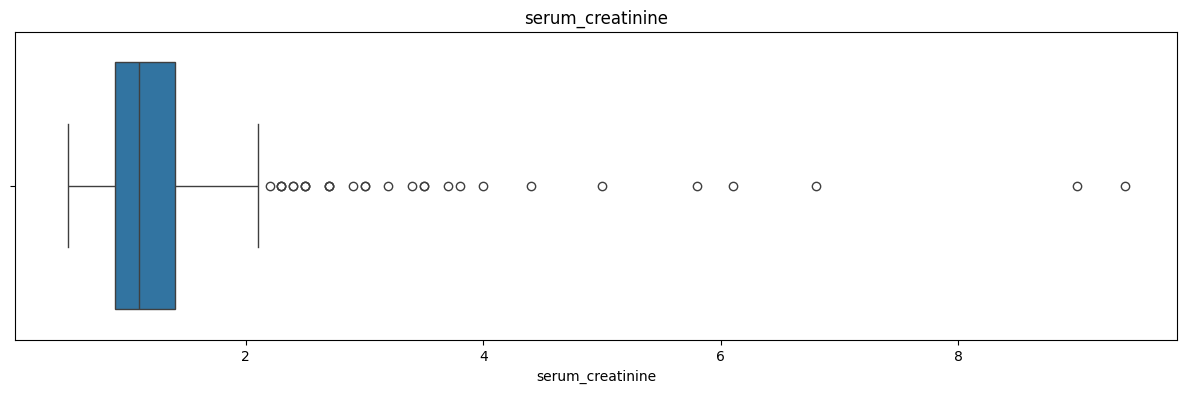

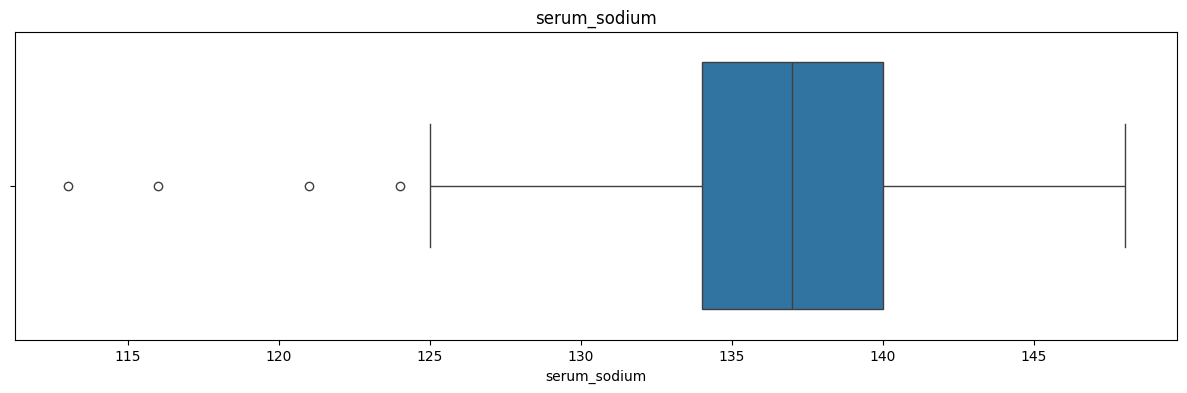

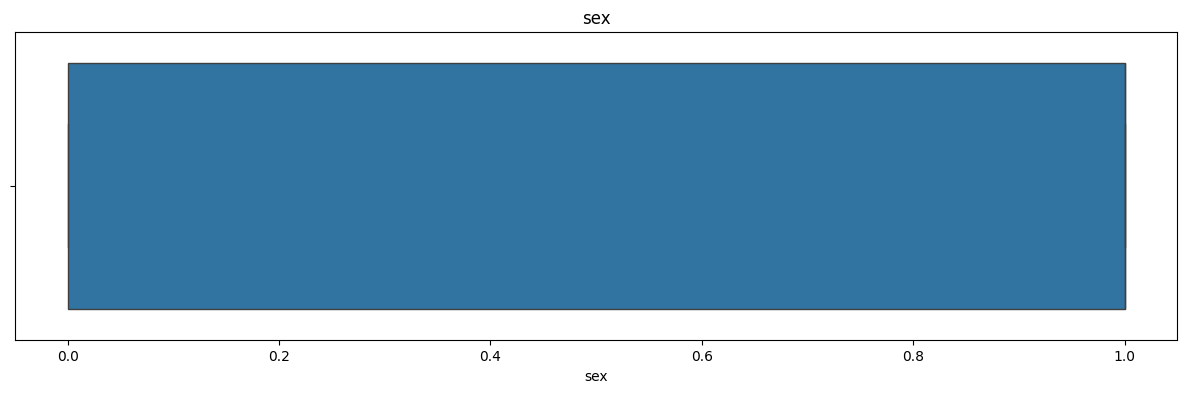

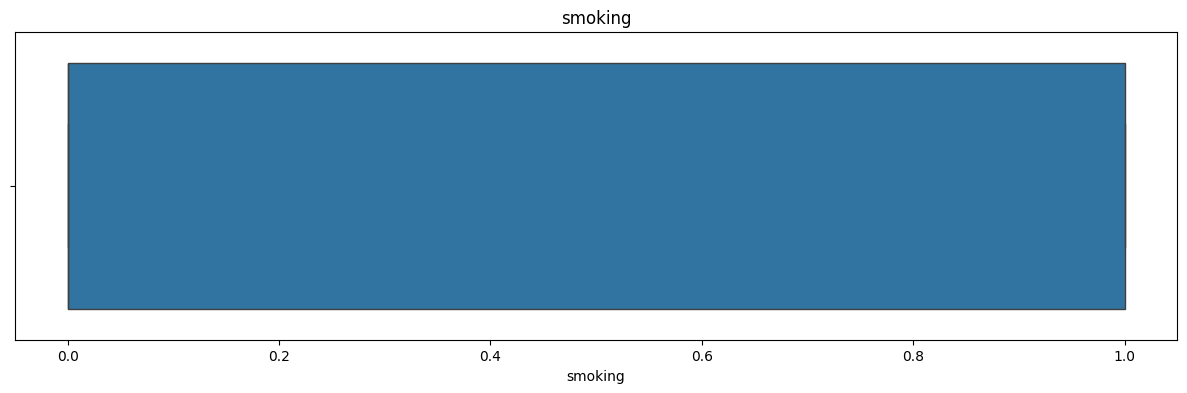

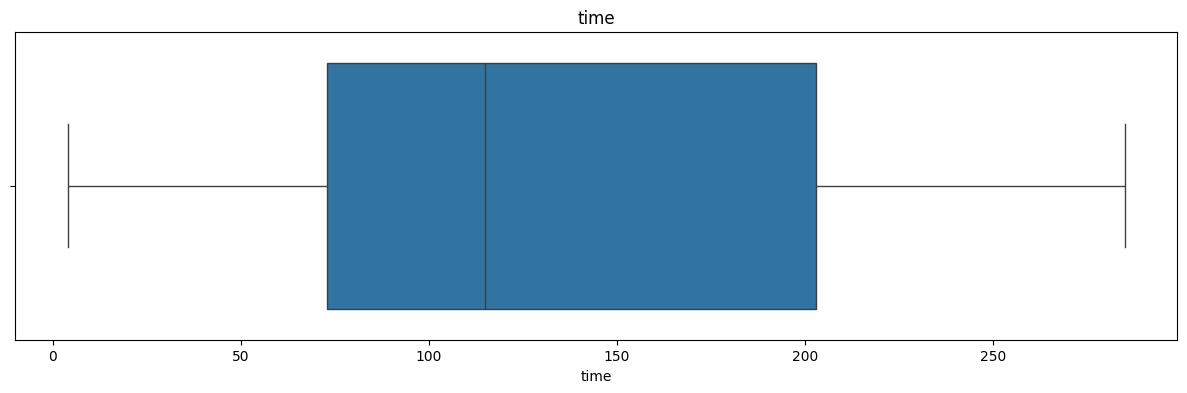

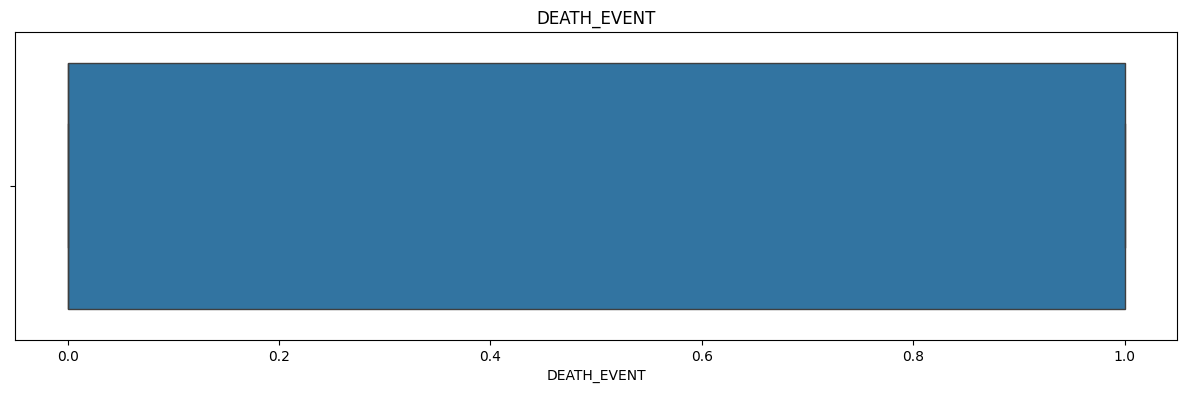

In [15]:
# Megecek outlier menggunakan boxplot
for i in df[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df[numerical_col][i])

Terlihat melalui visualisasi boxplot masih terdapat outlier pada kolom.

In [16]:
# Membuat list untuk kolom yang memiliki outliers
outlier_col = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

# Handling outlier
for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    df.loc[df[col] < lower_boundary,col] = lower_boundary
    df.loc[df[col] > upper_boundary,col] = upper_boundary

In [17]:
# Lower Limit
Q1 = df[outlier_col].quantile(0.25)
# Upper Limit
Q3 = df[outlier_col].quantile(0.75)

IQR = Q3-Q1

# Lower Limit
low_limit = pd.DataFrame({"Lower Limit": Q1 - 1.5*IQR})
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":Q3 + 1.5*IQR})

# apply into dataframe
dt_quartile = pd.concat([up_limit, low_limit], axis=1)
dt_quartile

,Upper Limit,Lower Limit
creatinine_phosphokinase,1280.25,-581.75
ejection_fraction,67.50,7.50
platelets,440000.00,76000.00
serum_creatinine,2.15,0.15
serum_sodium,149.00,125.00


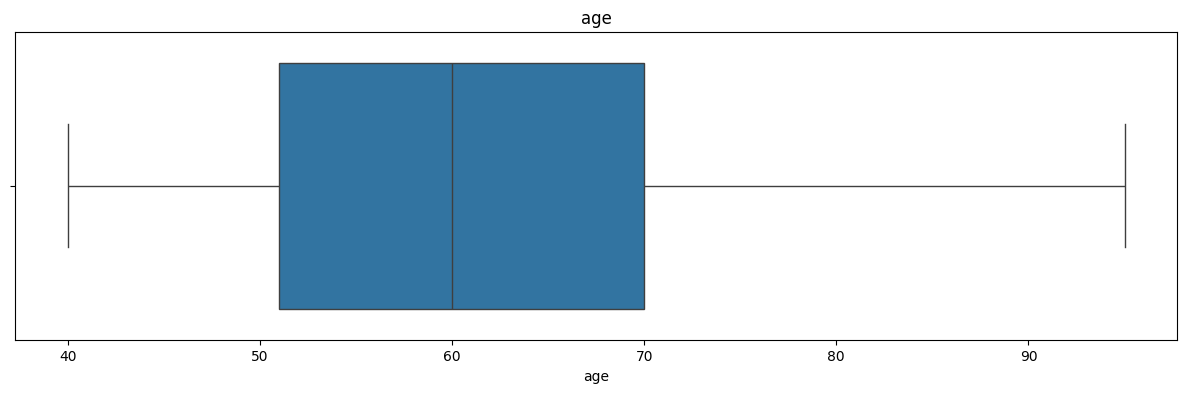

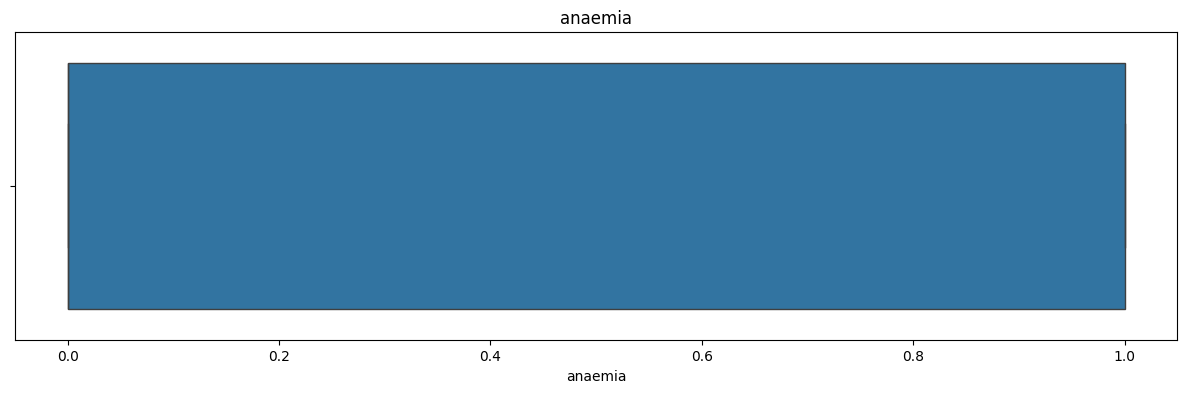

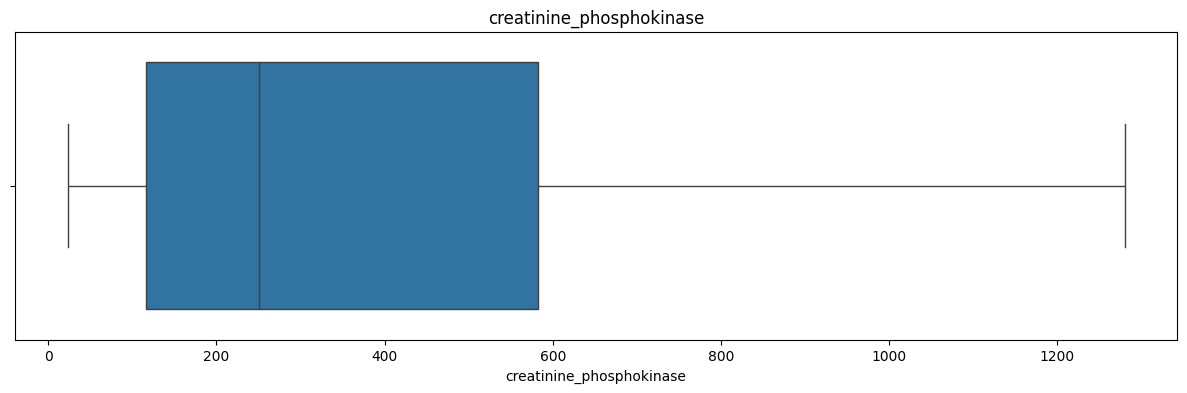

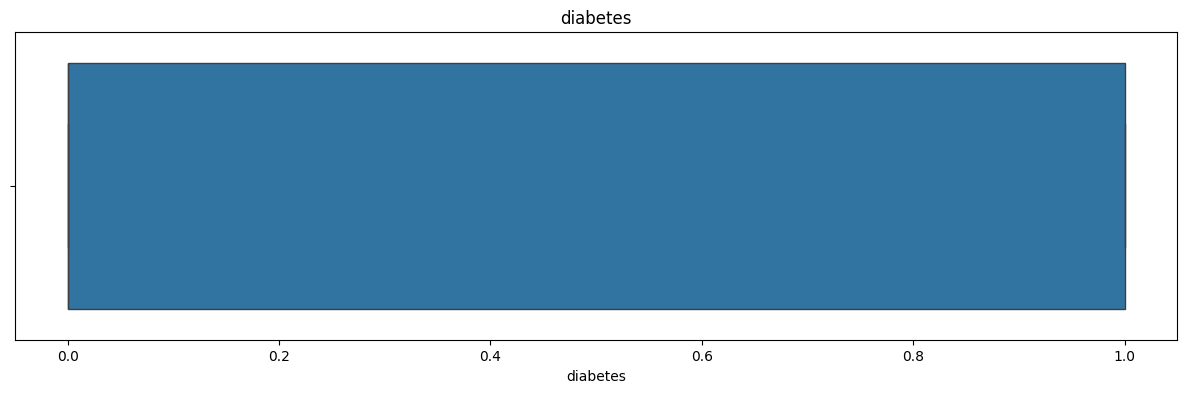

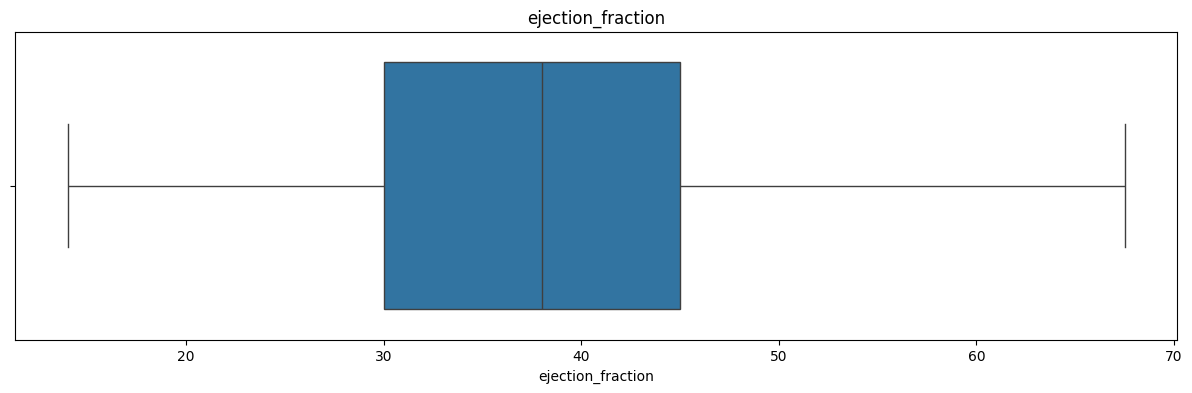

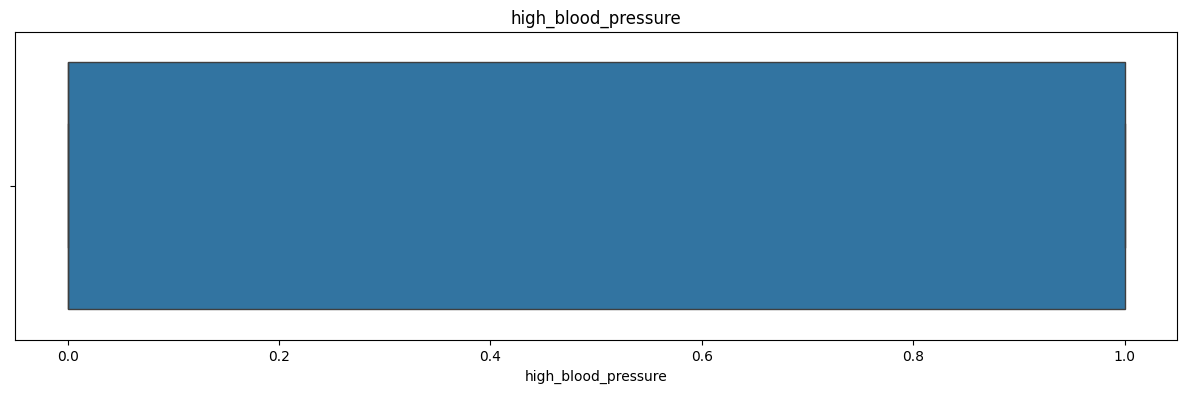

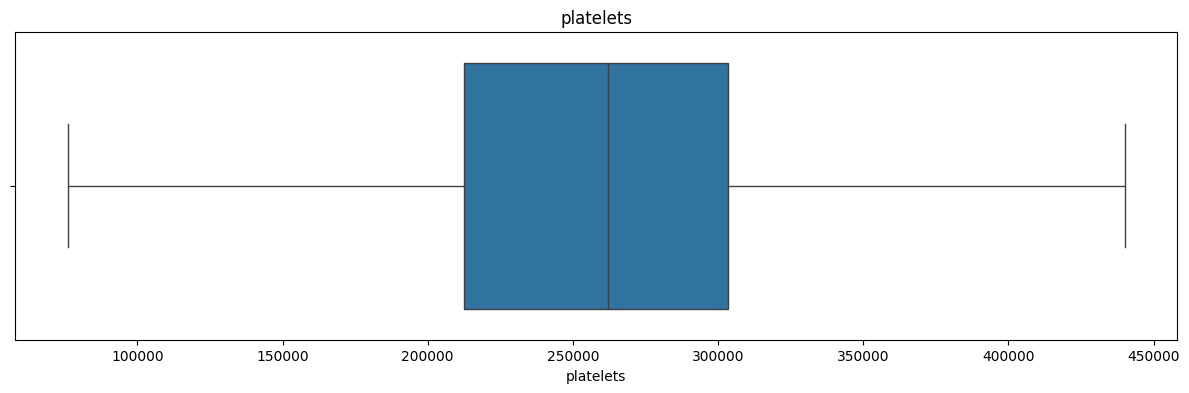

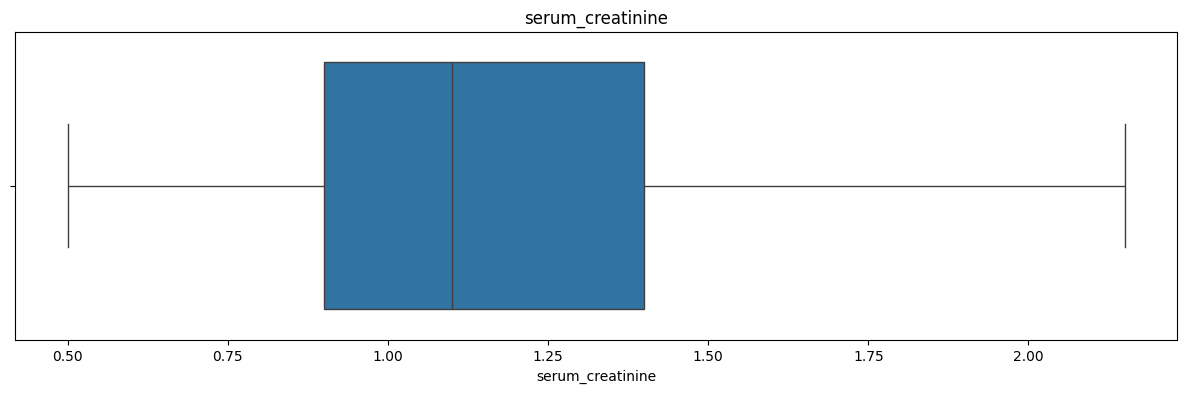

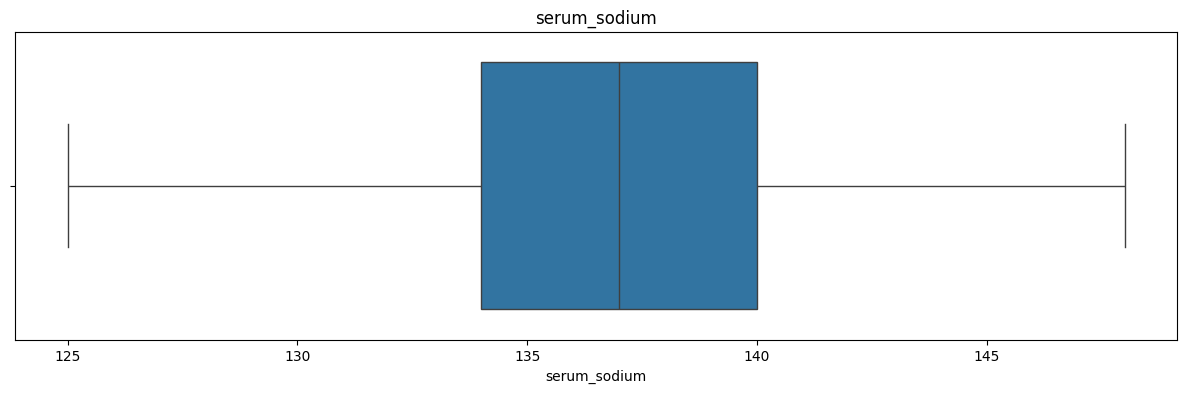

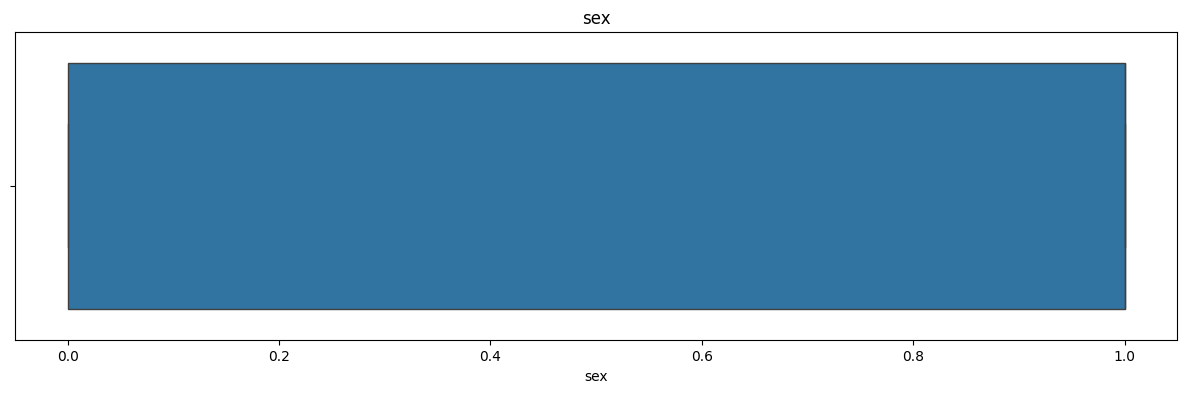

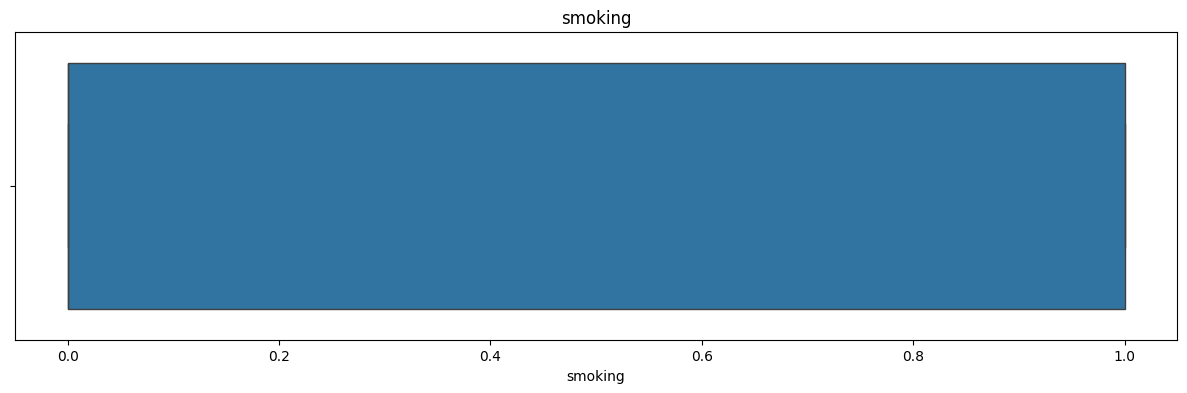

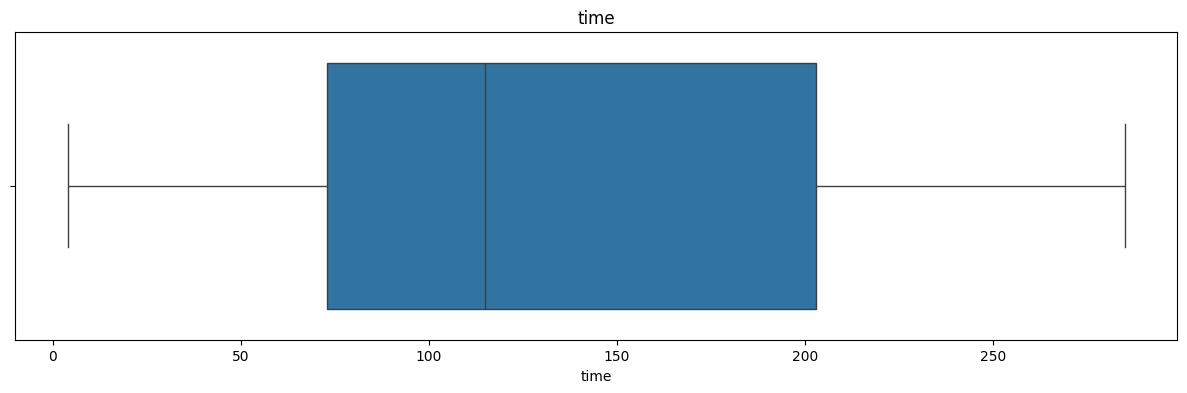

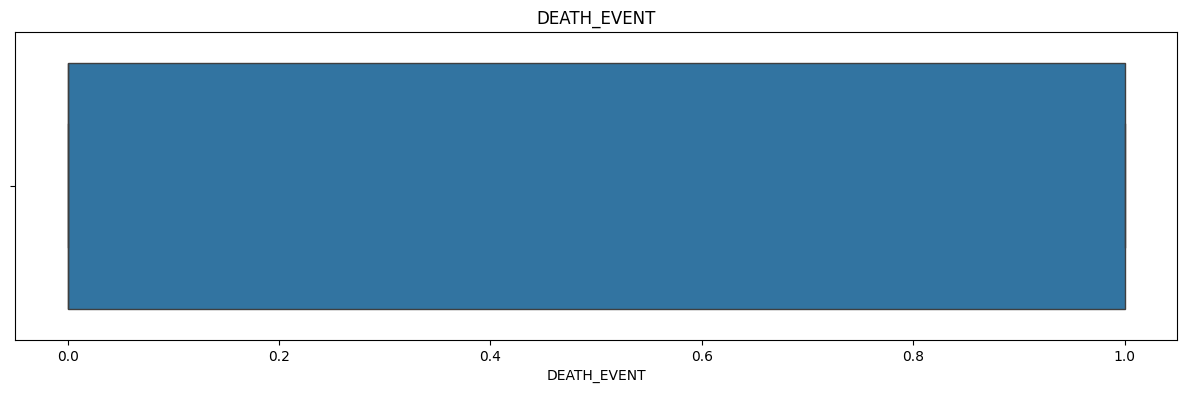

In [18]:
# Megecek kembali outlier menggunakan boxplot
for i in df[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df[numerical_col][i])

## 4. Mengecek Duplicate Data


In [19]:
df.duplicated().sum()

0

Pada dataframe tidak terdapat duplicate data 

 # __E. EXPLORATORY DATA ANALYSIS (EDA)__
----------------------------
    Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 1. Melihat Describe Data

In [20]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,424.214883,0.418060,38.033445,0.351171,259163.714883,1.234515,136.712375,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,385.449328,0.494067,11.685643,0.478136,81478.304369,0.440098,4.076971,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,76000.000000,0.500000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1280.250000,1.000000,67.500000,1.000000,440000.000000,2.150000,148.000000,1.000000,1.00000,285.000000,1.00000


*`Age`*
- Umur yang tercatat dimulai dari umur 40 sampai 95 tahun
- Rata-rata Usia pada Pasien Penyakit Jantung berkisar 60 Tahun
- Usia terendah pada Pasien Penyakit Jantung berada pada umur 40 Tahun
- Usia tertinggi pada Pasien Penyakit Jantung berada pada umur 95 Tahun

*`Creatinine Phosphokinase`*
- Rata-rata Creatinine Phosphokinase pada Pasien Penyakit Jantung berada di 581.839465
- Creatinine Phosphokinase terendah pada Pasien Penyakit Jantung berada di 23.00
- Creatinine Phosphokinase tertinggi pada Pasien Penyakit Jantung berada di 7861.00

untuk detail feature lainnya dapat dilihat pada deskripsi ringkasan tabel di atas

In [21]:
df.rename(columns={'DEATH_EVENT':'death','high_blood_pressure':'hypertension'}, inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1


In [22]:
df1 = df.copy()

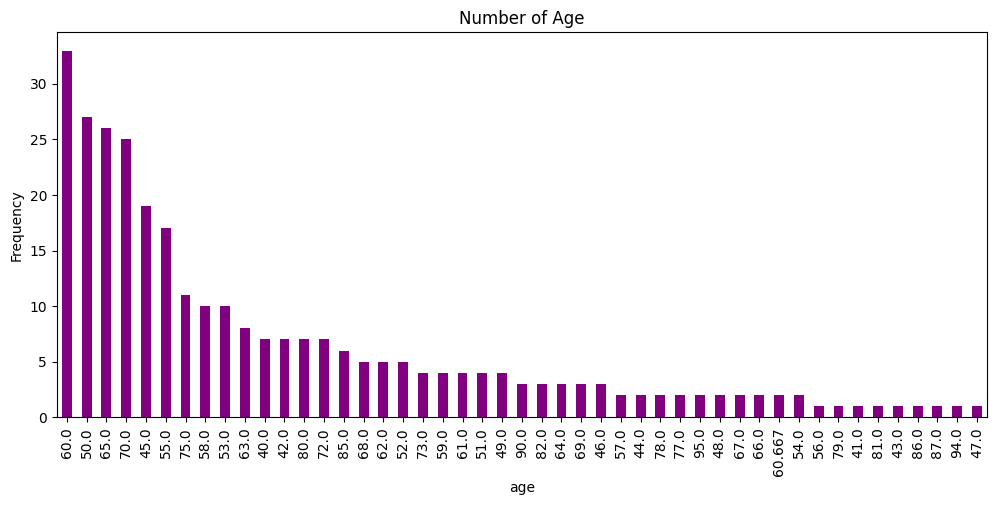

In [23]:
# Jumlah perjalanan/pemesanan menggunakan uber
df_age = df1.value_counts('age')
df_age.plot(kind = 'bar', figsize=(12,5), color='purple')

plt.title('Number of Age')
plt.xlabel('age')
plt.ylabel('Frequency')

plt.show()

Dari dataset yang tercatat kebanyakan berumur 60  

In [24]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    180
diabetes                      2
ejection_fraction            16
hypertension                  2
platelets                   158
serum_creatinine             21
serum_sodium                 23
sex                           2
smoking                       2
time                        148
death                         2
dtype: int64

In [25]:
# Melihat death_event berdasarkan kelompok usia
death_event_40s=df1.loc[df['age']<50,'death'].value_counts()
death_event_50s=df1.loc[df['age']<60,'death'].value_counts()
death_event_60s=df1.loc[df['age']<70,'death'].value_counts()
death_event_70s=df1.loc[df['age']<80,'death'].value_counts()
death_event_80s=df1.loc[df['age']<90,'death'].value_counts()
death_event_90s=df1.loc[df['age']<100,'death'].value_counts()

# Membuat data frame dari fitur death_event berdasarkan pengelompokan usia
df_deathByAge=pd.DataFrame({'40s':death_event_40s,'50s':death_event_50s,
             '60s':death_event_60s,'70s':death_event_70s,
             '80s':death_event_80s,'90s':death_event_90s})
df_deathByAge=df_deathByAge.transpose()
df_deathByAge

death,0,1
40s,36,11
50s,98,31
60s,164,58
70s,196,78
80s,202,91
90s,203,96


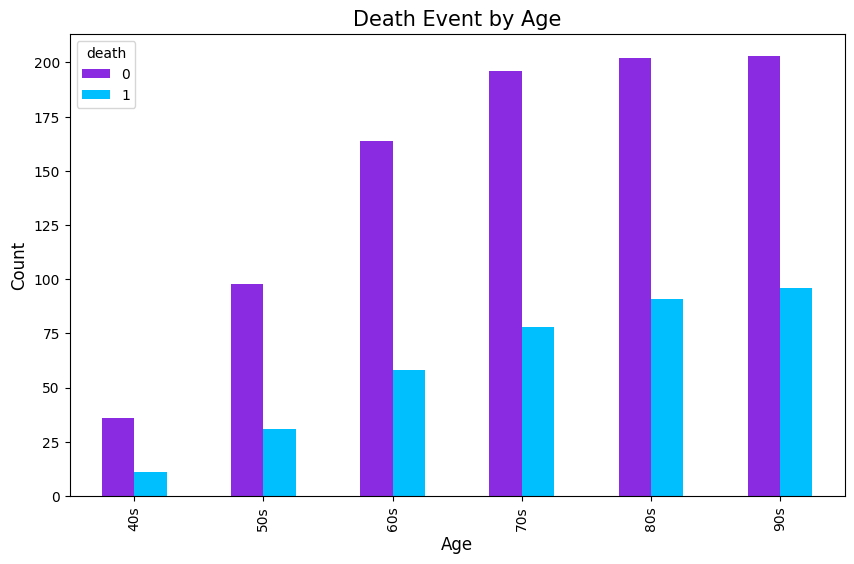

In [26]:
# Visualisasi data death event berdasarkan kelompok usia
df_deathByAge.plot(kind='bar', figsize=(10,6),
                  color=['blueviolet','deepskyblue'])
plt.title('Death Event by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

- Dari bar chart tersebut tampak bahwa semakin tinggi usia seseorang semakin rentan terkena penyakit jantung dan semakin besar juga jumlah meninggalnya.

death
0    67.892977
1    32.107023
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

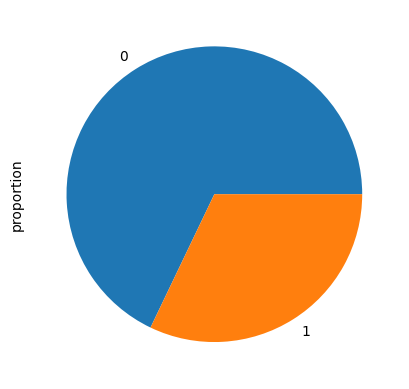

In [27]:
display(df1.death.value_counts(normalize = True)*100)
df1.death.value_counts(normalize = True).plot(kind = 'pie')

sex
1    65.024631
0    34.975369
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

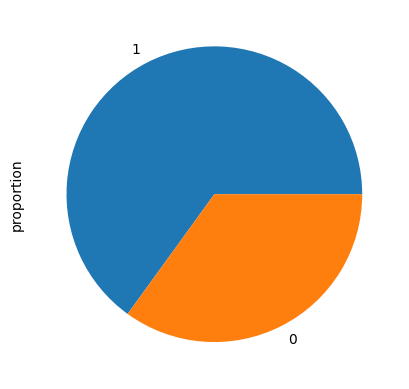

In [28]:
survived = df1[df1['death'] == 0]

display(survived.sex.value_counts(normalize = True)*100)
survived.sex.value_counts(normalize = True).plot(kind = 'pie')

sex
1    64.583333
0    35.416667
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

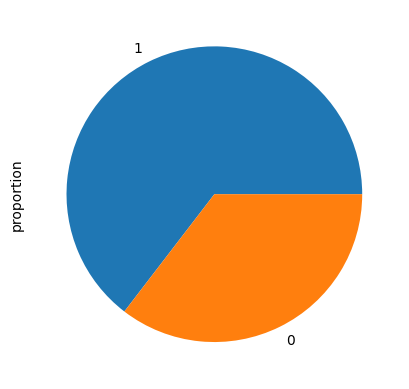

In [29]:
not_survived = df1[df1['death'] == 1]

display(not_survived.sex.value_counts(normalize = True)*100)
not_survived.sex.value_counts(normalize = True).plot(kind = 'pie')

In [30]:
# Jumlah yang meninggal dan tidak meninggal berdasarkan gender
female=df1[df1['sex']==0]
male=df1[df1['sex']==1]
male_not_survived=len(male[male['death']==1])
female_not_survived=len(female[female['death']==1])
male_survived=len(male[male['death']==0])
female_survived=len(female[female['death']==0])
df_survivalBySex=pd.DataFrame({'Keterangan':['male_not_survived',
                                           'female_not_survived',
                                           'male_survived',
                                           'female_survived'],
                             'Number': [male_not_survived,female_not_survived,
                                       male_survived,female_survived]})
df_survivalBySex=df_survivalBySex.set_index('Keterangan')
df_survivalBySex

,Number
Keterangan,
male_not_survived,62
female_not_survived,34
male_survived,132
female_survived,71


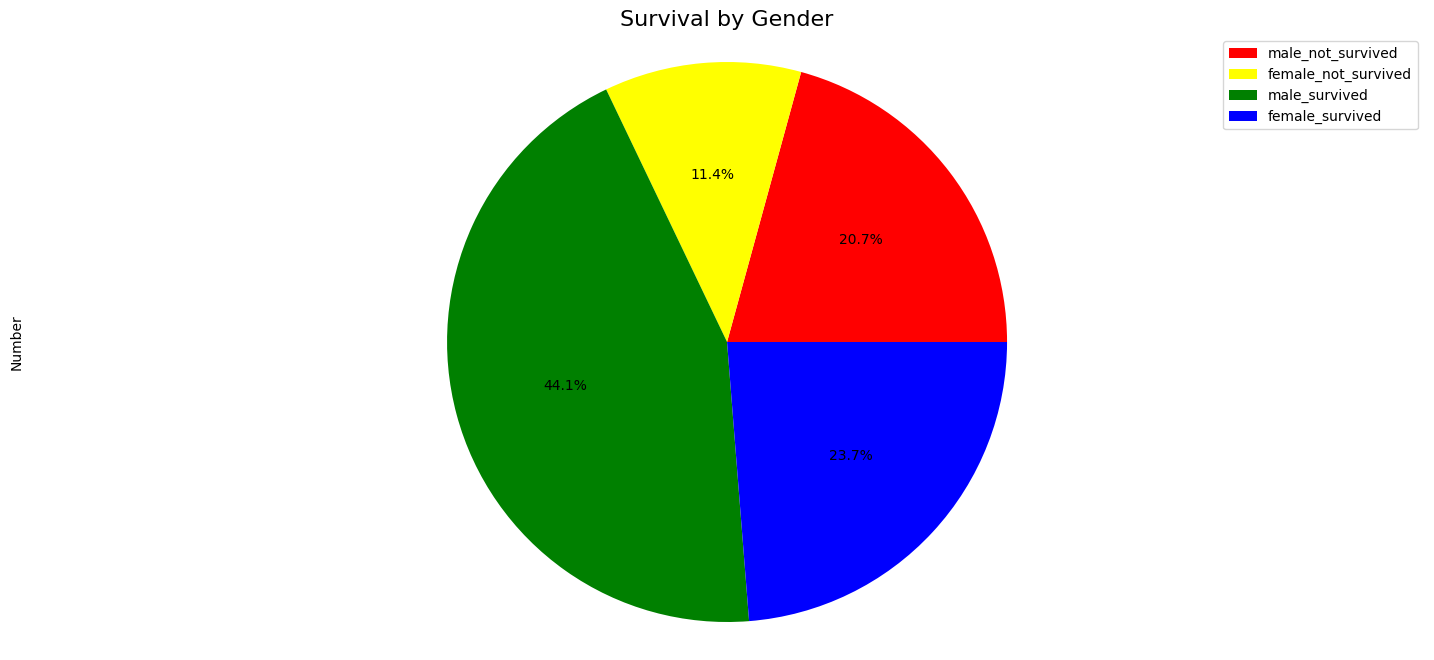

In [31]:
# Membuat pie chart dari data survival berdasar gender
color_list=['red','yellow','green','blue']
df_survivalBySex['Number'].plot(kind='pie', figsize=(18,8),
                               autopct='%1.1f%%',
                                colors=color_list,labels=None)
plt.title('Survival by Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels = df_survivalBySex.index)

Persentase paling banyak yang tidak selamat karena penyakit jantung berdasarkan gender adalah laki-laki sebesar 64.583% dibandingkan perempuan.

In [32]:
male_smoking = len(male[male['smoking']==1])
female_smoking = len(female[female['smoking']==1])
male_not_smoking = len(male[male['smoking']==0])
female_not_smoking = len(female[female['smoking']==0])
df_smokingByGender = pd.DataFrame({'Keterangan':['male_smoking','female_smoking','male_not_smoking','female_not_smoking'],
                                'Number':[male_smoking, female_smoking, male_not_smoking, female_not_smoking]})
df_smokingByGender = df_smokingByGender.set_index('Keterangan')
df_smokingByGender

,Number
Keterangan,
male_smoking,92
female_smoking,4
male_not_smoking,102
female_not_smoking,101


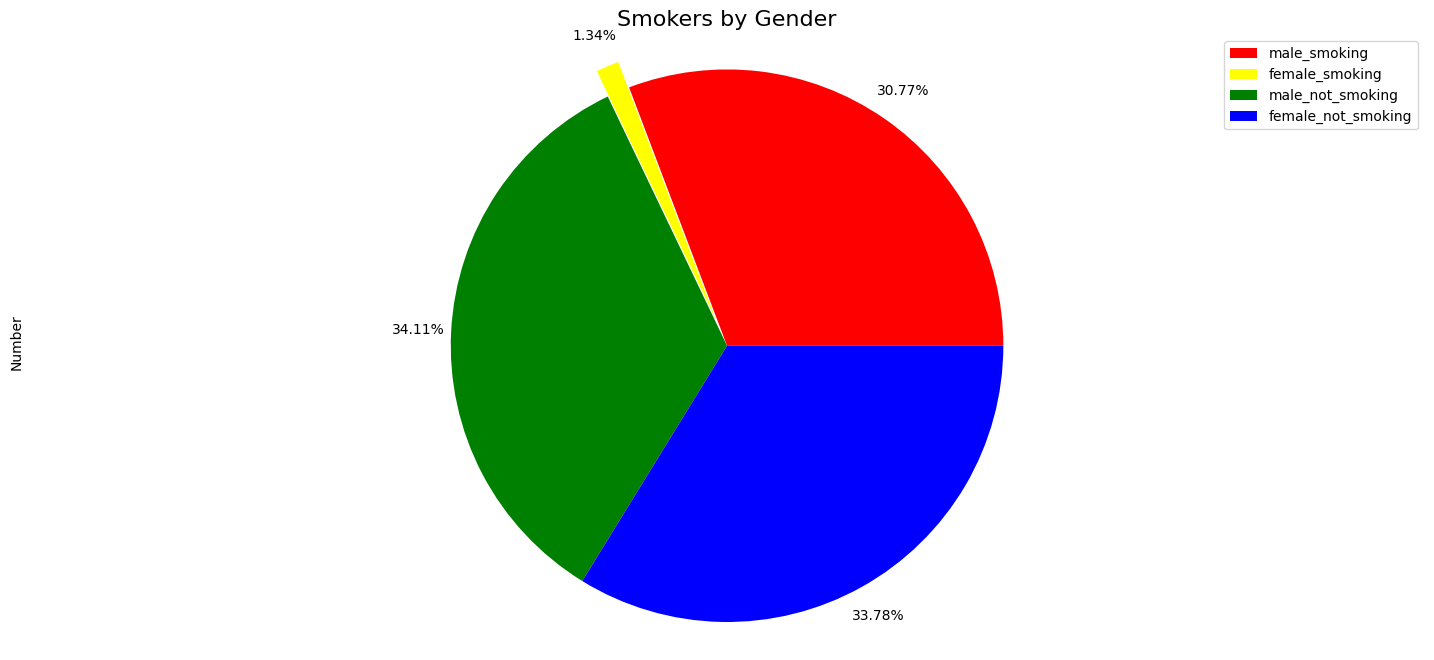

In [33]:
# Pie chart smoking by gender
color_list2 = ['red','yellow','green','blue']
explode_list = [0,0.1,0,0]
df_smokingByGender['Number'].plot(kind = 'pie', labels = None,
                                  figsize = (18,8),autopct = '%1.2f%%',
                                 colors = color_list2,
                                 explode = explode_list,
                                 pctdistance = 1.12)
plt.title('Smokers by Gender', fontsize = 16)
plt.axis('equal')
plt.legend(labels = df_smokingByGender.index)

Perokok dengan jenis kelamin perempuan sangatlah sedikit yaitu hanya 1.34% sementara perokok dengan jenis kelamin laki-laki mencapai 30.8%. Informasi tersebut menunjukkan bahwa merokok meningkatkan kemungkinan kematian akibat penyakit jantung. Untuk memastikan hal tersebut akan dibuat juga grafik yang menunjukkan jumlah yang meninggal maupun tidak berdasarkan perokok dan yang bukan perokok.

In [34]:
# Jumlah yang merokok
len(df1[df1['smoking']==1])

96

In [35]:
df_deathBySmoking=df1.groupby(['smoking','death'])['death'].count().unstack()
df_deathBySmoking

death,0,1
smoking,,
0,137,66
1,66,30


In [36]:
survive = df1[df1['death']==0]
death = df1[df1['death']==1]
survive_smoking = len(survive[survive['smoking']==1])
death_smoking = len(death[death['smoking']==1])
survive_not_smoking = len(survive[survive['smoking']==0])
death_not_smoking = len(death[death['smoking']==0])
df_deathBySmoking2 = pd.DataFrame({'Keterangan':['survive_smoking','death_smoking','survive_not_smoking','death_not_smoking'],
                                'Number':[survive_smoking,death_smoking,survive_not_smoking,death_not_smoking]})
df_deathBySmoking2 = df_deathBySmoking2.set_index('Keterangan')
df_deathBySmoking2

,Number
Keterangan,
survive_smoking,66
death_smoking,30
survive_not_smoking,137
death_not_smoking,66


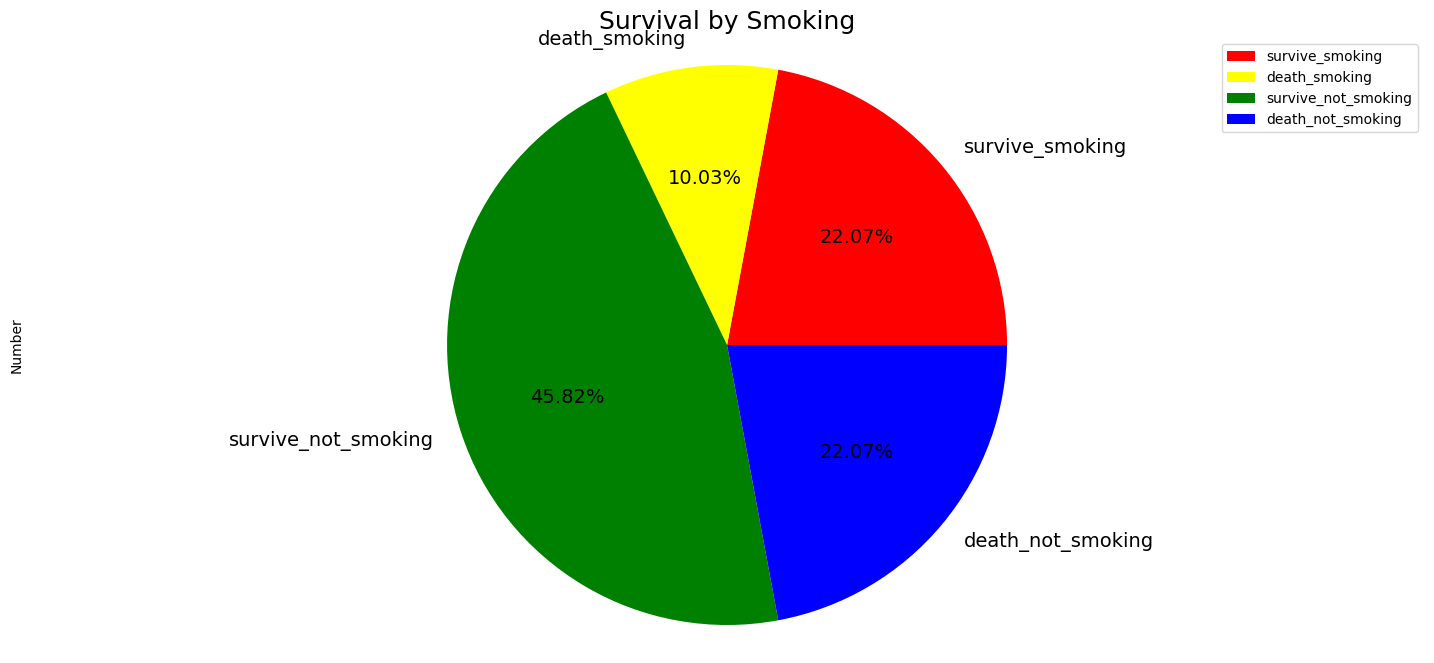

In [37]:
# Pie chart death event by smoking
color_list2 = ['red','yellow','green','blue']
df_deathBySmoking2['Number'].plot(kind = 'pie',
                                  figsize = (18,8), autopct = '%1.2f%%',
                                 colors = color_list2,
                                 fontsize = 14)
plt.title('Survival by Smoking', fontsize = 18)
plt.axis('equal')
plt.legend(labels = df_deathBySmoking2.index)

Text(0.5, 1.0, 'Jumlah Kematian Berdasarkan Perokok dan Bukan Perokok')

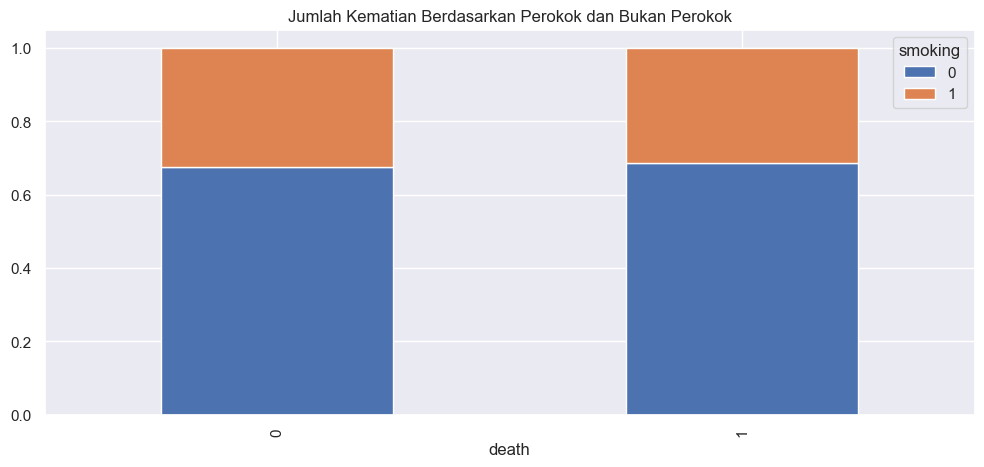

In [38]:
# 0 = No (Tidak Merokok); 1 = Yes (Merokok)
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.death, df1.smoking, normalize = 'index').plot(kind='bar', stacked = True)
plt.title('Jumlah Kematian Berdasarkan Perokok dan Bukan Perokok')

Dari pie chart dan bar chart tersebut dapat dilihat bahwa orang yang tidak merokok lebih banyak yang tidak meninggal yaitu sebanyak 45.8% namun merokok tidak bisa disimpulkan sebagai penyebab utama kematian dari penyakit jantung karena hanya ada 96 orang dari 299 data orang yang merokok dan mengidap penyakit jantung dengan persentase kematian sebesar 10%.

In [39]:
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


In [40]:
# Jumlah penderita anemia
anemia = len(df1[df1['anaemia']==1])
not_anemia = len(df1[df1['anaemia']==0])

# Jumlah penderita diabetes
diabetes = len(df1[df1['diabetes']==1])
not_diabetes = len(df1[df1['diabetes']==0])

# Jumlah penderita hipertensi
hypertension = len(df1[df1['hypertension']==1])
not_hypertension = len(df1[df1['hypertension']==0])

# Membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
df_anemia_diabet_hyper = pd.DataFrame(
    {'Keterangan':['anemia', 'diabetes', 'hypertension'],
     'No':[not_anemia, not_diabetes, not_hypertension],
    'Yes':[anemia, diabetes, hypertension]})

# Mensetting index
df_anemia_diabet_hyper = df_anemia_diabet_hyper.set_index('Keterangan')
df_anemia_diabet_hyper

,No,Yes
Keterangan,,
anemia,170,129
diabetes,174,125
hypertension,194,105


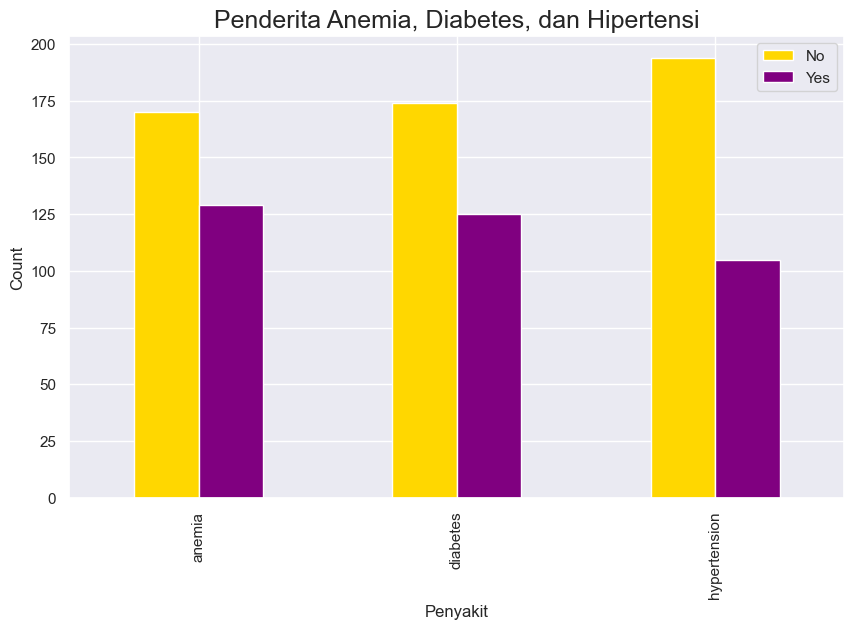

In [41]:
# Visualisasi jumlah penderita anemia, diabetes, hipertensi
df_anemia_diabet_hyper.plot(kind='bar', figsize=(10,6),
                  color=['gold','purple'])
plt.title('Penderita Anemia, Diabetes, dan Hipertensi', fontsize=18)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Penderita penyakit jantung paling banyak memiliki riwayat penyakit anemia diikuti diabetes dan hipertensi. Selanjutnya akan dilihat apakah orang yang tidak memiliki riwayat ketiga penyakit tersebut lebih banyak yang survive dibanding yang memiliki riwayat penyakit tersebut.

In [42]:
# Mengambil data pasien yang memiliki riwayat ketiga penyakit tersebut
df_ADH = df1.loc[(df1['anaemia']==1) & (df1['diabetes']==1) & (df1['hypertension']==1)]
death_ADH = len(df_ADH[df_ADH['death']==1])
not_death_ADH = len(df_ADH[df_ADH['death']==0])
print('Meninggal :', death_ADH)
print('Tidak Meninggal :', not_death_ADH)

Meninggal : 6
Tidak Meninggal : 11


In [43]:
# Mengambil data pasien yang memiliki riwayat penyakit anemia dan diabetes
df_AD=df1.loc[(df1['anaemia']==1) & (df1['diabetes']==1)]
death_AD=len(df_AD[df_AD['death']==1])
not_death_AD=len(df_AD[df_AD['death']==0])
print('Meninggal :',death_AD)
print('Tidak Meninggal :', not_death_AD)

Meninggal : 18
Tidak Meninggal : 35


In [44]:
# Mengambil data pasien yang memiliki riwayat penyakit anemia dan hipertensi
df_AH = df1.loc[(df1['anaemia']==1)  & (df['hypertension']==1)]
death_AH = len(df_AH[df_AH['death']==1])
not_death_AH = len(df_AH[df_AH['death']==0])
print('Meninggal :', death_AH)
print('Tidak Meninggal :', not_death_AH)

Meninggal : 19
Tidak Meninggal : 29


In [45]:
# Mengambil data pasien yang memiliki riwayat penyakit diabetes dan hipertensi
df_DH = df1.loc[(df1['diabetes']==1) & (df['hypertension']==1)]
death_DH = len(df_DH[df_DH['death']==1])
not_death_DH = len(df_DH[df_DH['death']==0])
print('Meninggal :',death_DH)
print('Tidak Meninggal :', not_death_DH)

Meninggal : 17
Tidak Meninggal : 26


In [46]:
# Mengambil data pasien yang memiliki riwayat penyakit anemia
df_A = df1.loc[(df1['anaemia']==1) ]
death_A = len(df_A[df_A['death']==1])
not_death_A = len(df_A[df_A['death']==0])
print('Meninggal :', death_A)
print('Tidak Meninggal :', not_death_A)

Meninggal : 46
Tidak Meninggal : 83


In [47]:
# Mengambil data pasien yang memiliki riwayat penyakit diabetes
df_D = df1.loc[(df1['diabetes']==1)]
death_D = len(df_D[df_D['death']==1])
not_death_D = len(df_D[df_D['death']==0])
print('Meninggal :', death_D)
print('Tidak Meninggal :', not_death_D)

Meninggal : 40
Tidak Meninggal : 85


In [48]:
# Mengambil data pasien yang memiliki riwayat penyakit hipertensi
df_H = df1.loc[(df1['hypertension']==1)]
death_H = len(df_H[df_H['death']==1])
not_death_H = len(df_H[df_H['death']==0])
print('Meninggal :', death_H)
print('Tidak Meninggal :', not_death_H)

Meninggal : 39
Tidak Meninggal : 66


In [49]:
# Membuat dataframe baru berdasarkan informasi diatas
keterangan=['Anemia, Diabetes, dan Hipertensi',
           'Anemia dan Diabetes',
           'Anemia dan Hipertensi',
           'Diabetes dan Hipertensi',
           'Anemia','Diabetes','Hipertensi']
meninggal=[death_ADH, death_AD, death_AH, death_DH,
           death_A,death_D,death_H]
tidak_meninggal=[not_death_ADH, not_death_AD,
                not_death_AH, not_death_DH,
                not_death_A, not_death_D, not_death_H]
ADH_df=pd.DataFrame({'Keterangan':keterangan,'Meninggal':meninggal,
             'Tidak Meninggal':tidak_meninggal})
persen=pd.DataFrame({'Meninggal (%)':round((ADH_df['Meninggal']/(ADH_df['Meninggal']+ADH_df['Tidak Meninggal']))*100,2)})
ADH_df=pd.concat([ADH_df,persen], axis=1)
ADH_df

,Keterangan,Meninggal,Tidak Meninggal,Meninggal (%)
0,"Anemia, Diabetes, dan Hipertensi",6,11,35.29
1,Anemia dan Diabetes,18,35,33.96
2,Anemia dan Hipertensi,19,29,39.58
3,Diabetes dan Hipertensi,17,26,39.53
4,Anemia,46,83,35.66
5,Diabetes,40,85,32.00
6,Hipertensi,39,66,37.14


In [50]:
# Mengurutkan berdasarkan persentase kematian dari tertinggi ke terendah
ADH_df.sort_values(by='Meninggal (%)', ascending=False)

,Keterangan,Meninggal,Tidak Meninggal,Meninggal (%)
2,Anemia dan Hipertensi,19,29,39.58
3,Diabetes dan Hipertensi,17,26,39.53
6,Hipertensi,39,66,37.14
4,Anemia,46,83,35.66
0,"Anemia, Diabetes, dan Hipertensi",6,11,35.29
1,Anemia dan Diabetes,18,35,33.96
5,Diabetes,40,85,32.00


Berdasarkan tabel di atas didapat informasi bahwa penderita penyakit jantung yang memiliki riwayat penyakit anemia dan hipertensi atau diabetes dan hipertensi memiliki persentase kematian yang paling tinggi.

Persentase yang meninggal pada data di atas juga menunjukan angka dikisaran 30% ke atas yang menunjukan adanya kemungkinan peningkatan risiko kematian bagi pasien penyakit jantung yang memiliki riwayat penyakit anemia, hipertensi, atau diabetes.

In [51]:
df1.shape

(299, 13)

In [52]:
# Menyimpan data kontinu dalam dataframe baru
kontinu=['age','creatinine_phosphokinase','ejection_fraction',
        'platelets','serum_creatinine','serum_sodium','time']
df_kontinu=df1[kontinu]
df_kontinu.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582.00,20.0,265000.00,1.90,130,4
1,55.0,1280.25,38.0,263358.03,1.10,136,6
2,65.0,146.00,20.0,162000.00,1.30,129,7
3,50.0,111.00,20.0,210000.00,1.90,137,7
4,65.0,160.00,20.0,327000.00,2.15,125,8


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'ejection_fraction'}>],
       [<Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'serum_sodium'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

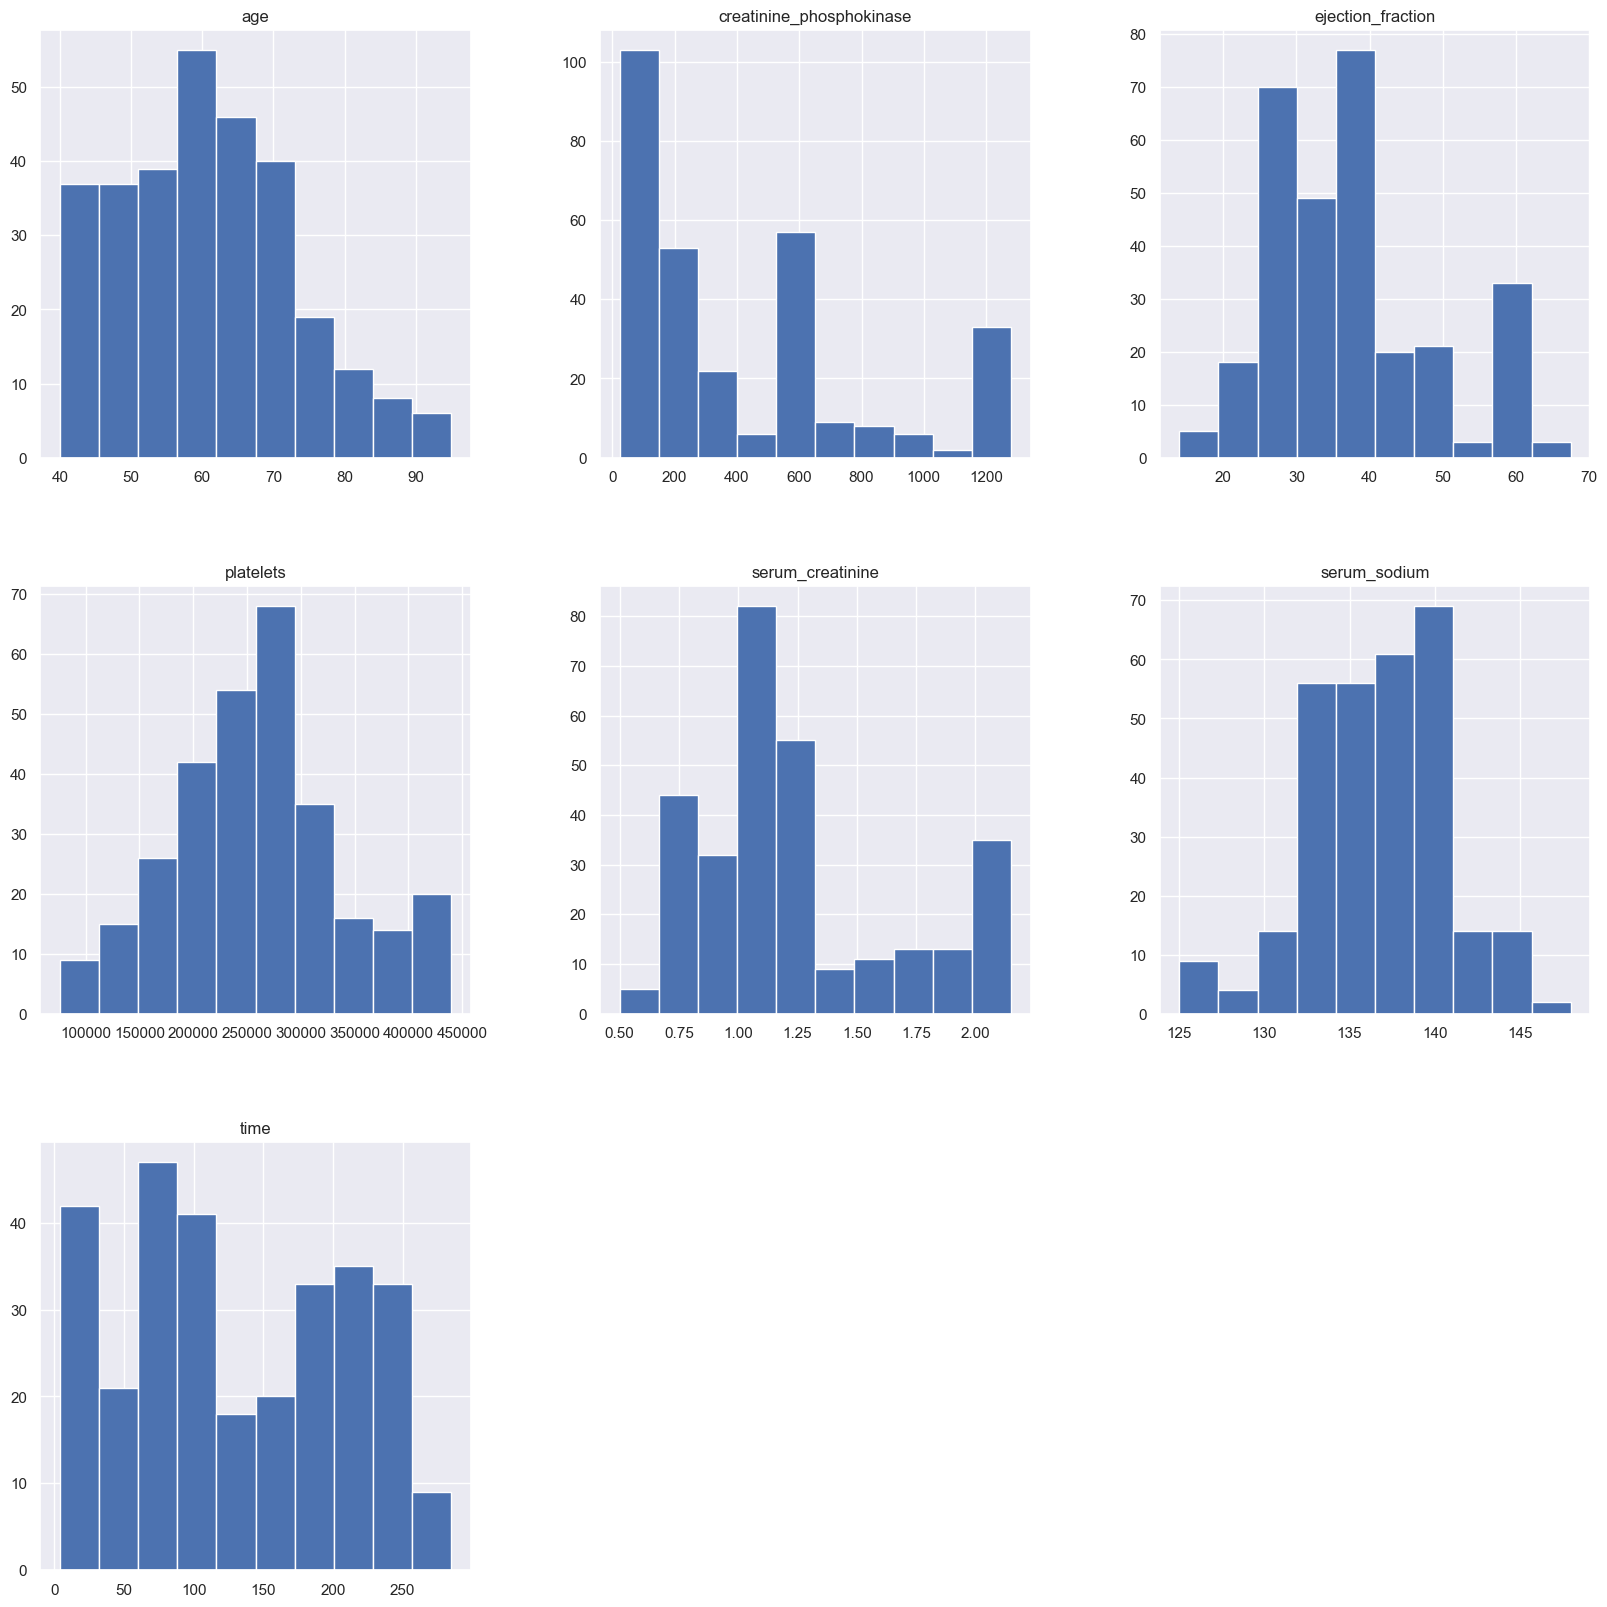

In [53]:
# Melihat distribusi frekuensi dari data kontinu
df_kontinu.hist(figsize=(20,20))

In [54]:
# Deskripsi statistik fitur kontinuous
print('Age:\n',scipy.stats.describe(df1['age'], ddof=1, bias=False))
print('\n Creatinine phosphokinase:\n',scipy.stats.describe(df1['creatinine_phosphokinase'], ddof=1, bias=False))
print('\n Ejection Fraction:\n',scipy.stats.describe(df1['ejection_fraction'], ddof=1, bias=False))
print('\n platelets:\n',scipy.stats.describe(df1['platelets'], ddof=1, bias=False))
print('\n serum_creatinine\n',scipy.stats.describe(df1['serum_creatinine'], ddof=1, bias=False))
print('\n serum_sodium:\n',scipy.stats.describe(df1['serum_sodium'], ddof=1, bias=False))
print('\n time:\n',scipy.stats.describe(df1['time'], ddof=1, bias=False))

Age:
 DescribeResult(nobs=299, minmax=(40.0, 95.0), mean=60.83389297658862, variance=141.48648290797067, skewness=0.4230619067286353, kurtosis=-0.18487053195417458)

 Creatinine phosphokinase:
 DescribeResult(nobs=299, minmax=(23.0, 1280.25), mean=424.21488294314383, variance=148571.18458480167, skewness=1.0706005533885474, kurtosis=0.029291232152156788)

 Ejection Fraction:
 DescribeResult(nobs=299, minmax=(14.0, 67.5), mean=38.03344481605351, variance=136.55424681825326, skewness=0.4729272090402715, kurtosis=-0.2729432150215567)

 platelets:
 DescribeResult(nobs=299, minmax=(76000.0, 440000.0), mean=259163.71488294314, variance=6638714082.787639, skewness=0.24247471450658037, kurtosis=0.02150467342218043)

 serum_creatinine
 DescribeResult(nobs=299, minmax=(0.5, 2.1499999999999995), mean=1.2345150501672242, variance=0.19368592175259802, skewness=0.9052966236707563, kurtosis=-0.25214363930111583)

 serum_sodium:
 DescribeResult(nobs=299, minmax=(125, 148), mean=136.7123745819398, vari

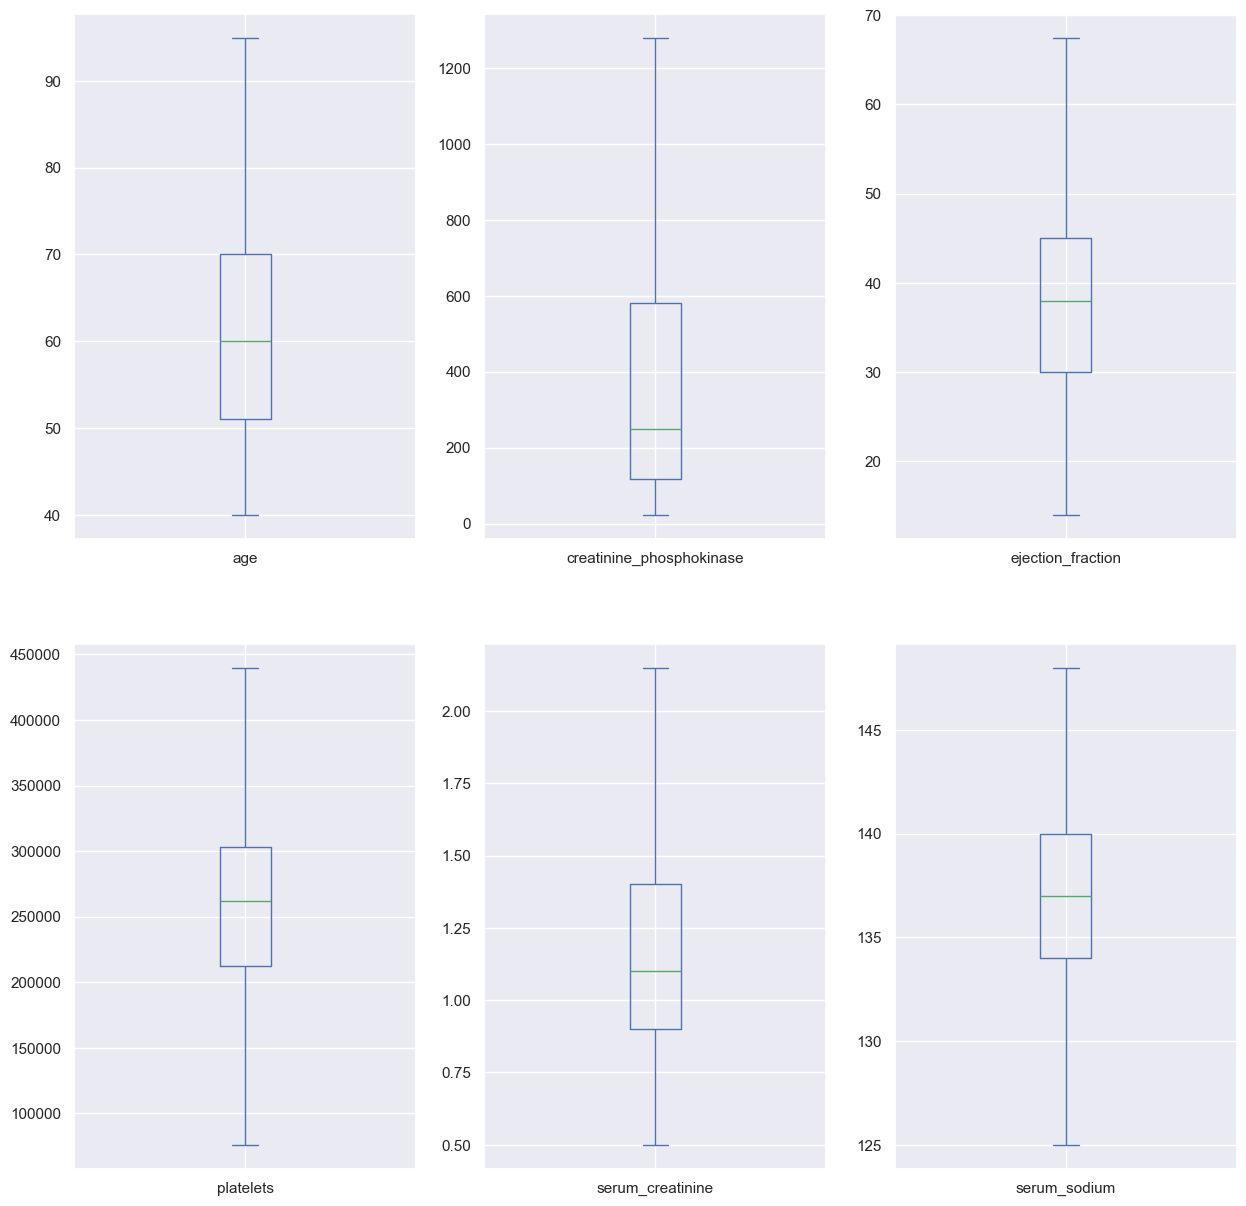

In [55]:
#melihat sebaran datanya melalui boxplot
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)
#membuat boxplot masing-masing fitur
df_kontinu[['age']].plot(kind='box', ax=ax1)
df_kontinu[['creatinine_phosphokinase']].plot(kind='box', ax=ax2)
df_kontinu[['ejection_fraction']].plot(kind='box', ax=ax3)
df_kontinu[['platelets']].plot(kind='box', ax=ax4)
df_kontinu[['serum_creatinine']].plot(kind='box', ax=ax5)
df_kontinu[['serum_sodium']].plot(kind='box', ax=ax6)
plt.show()

<Axes: >

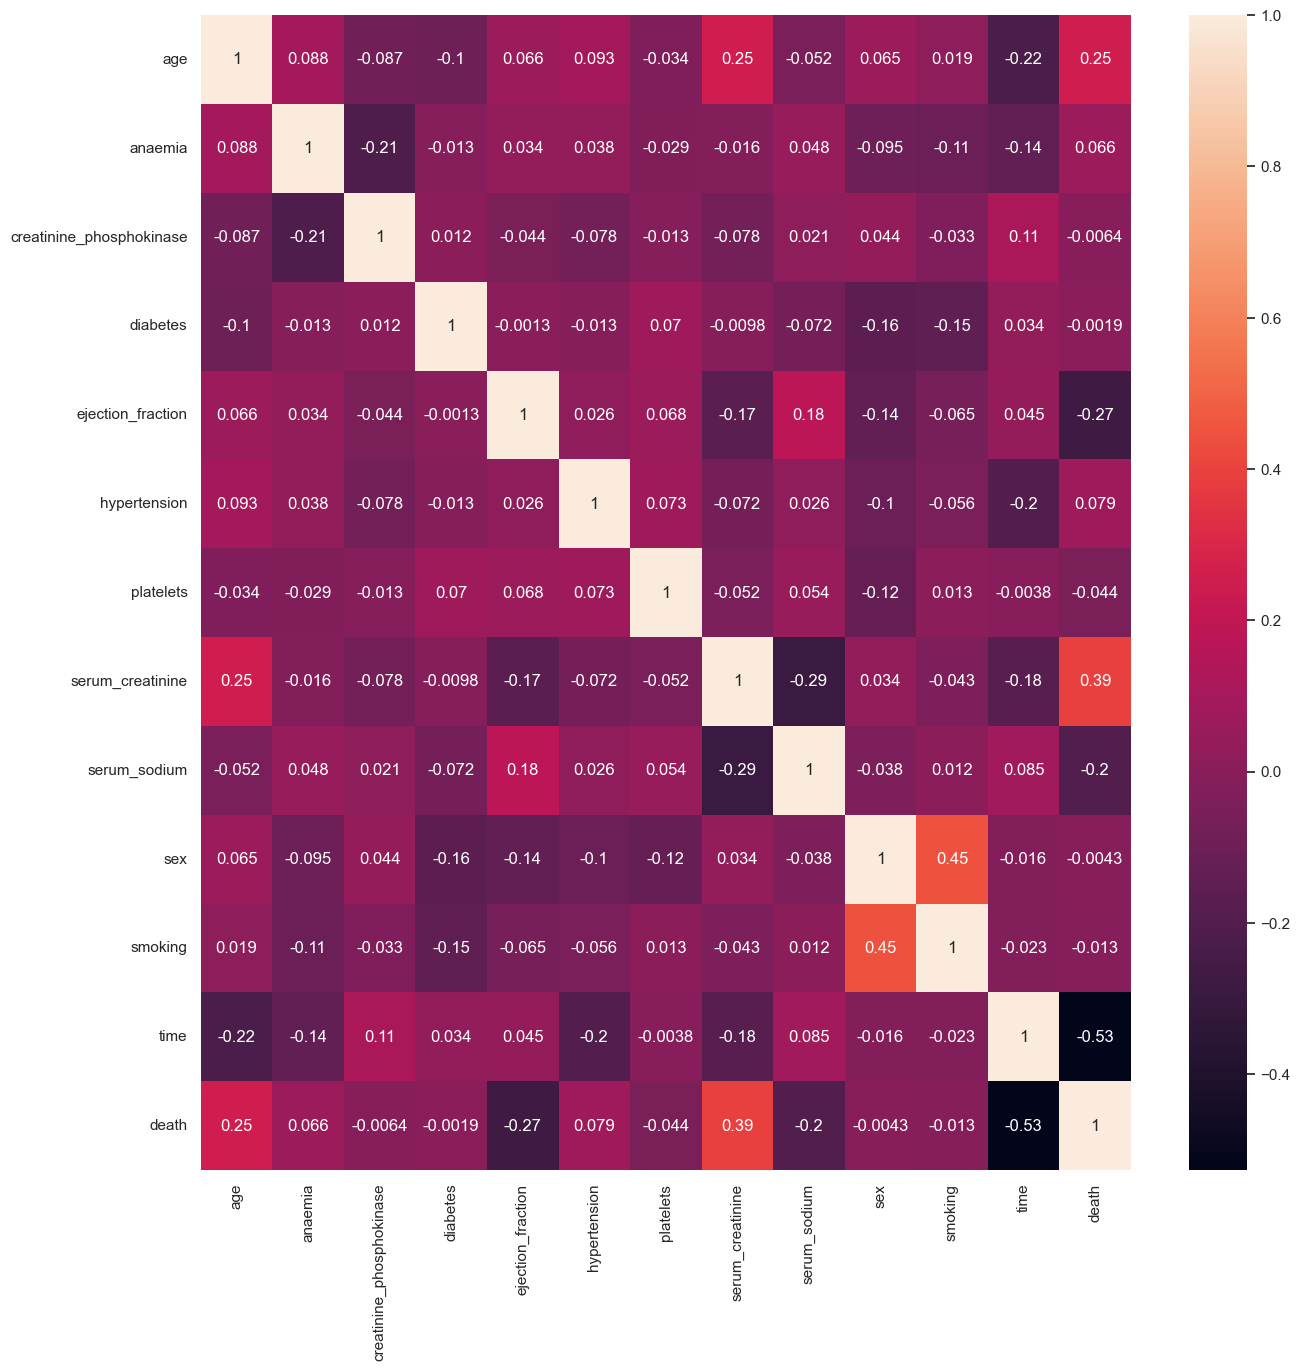

In [56]:
# Melihat korelasi antar fitur
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True)

Terdapat hubungan positif yang kuat antara death event dengan age dan serum_creatinine sedangkan terdapat hubungan negatif yang kuat antara death_event dengan time dan ejection_fraction.

Kemudian jika dilihat dari visualisasi data terlihat tidak balance, maka dataset ini dikatakan imbalanced

# __F. DATA PREPROCESSING__
-----------------------------------------------------------



## 1. Analisis Korelasi & Label Encod

In [57]:
df1.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    180
diabetes                      2
ejection_fraction            16
hypertension                  2
platelets                   158
serum_creatinine             21
serum_sodium                 23
sex                           2
smoking                       2
time                        148
death                         2
dtype: int64

In [58]:
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


## 2. Membuat Data Frame Berisi Feature yang Dipilih Berdasarkan Analisis Korelasi

In [59]:
df_pred = df1
df_pred

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


# G. PENDEFINISIAN DATA
--------------------------

   
Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Terdapat 8 atribut yang akan digunakan untuk membuat model perkiraan harga, yaitu **'Pickup_loc', 'destination'	,'Taxi'	,'name','price'	,'distance'	,'surge_multiplier', dan 'weather'**

Metode pengujian yang akan digunakan pada project kali ini adalah metode Linear Regression. Linear Regression adalah salah satu cara yang paling terkenal dan paling sederhana untuk memprediksi output, yang cocok dengan model linier untuk meminimalkan jumlah sisa kuadrat antara nilai prediksi dan nilai sebenarnya. Meskipun kelemahan utama dari linear regression adalah mengasumsikan linieritas antara variabel yang diprediksi dan variabel respons, tetapi data jarang dapat dipisahkan secara linier di dunia nyata.

In [60]:
x = df_pred.drop(columns=['death'])
y = df_pred['death']

In [61]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [62]:
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [63]:
# Split Data Menggunakan SMOTE untuk mengatasi IMbalanced pada Target
smote = SMOTE()
x_s, y_s = smote.fit_resample(x, y)
xs_train, xs_test, ys_train, ys_test = train_test_split(x_s, y_s, test_size=0.2, random_state=42)

## 1. Logistic Regression

In [64]:
# Membuat model Logistik Regression
lr_model = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

# Membuat model Logistik Regression SMOTE
lr_model_s = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

## 2. K-Nearest Neighbors

In [65]:
# Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

# Membuat model K-Nearest Neighbors SMOTE
knn_model_s = KNeighborsClassifier(n_neighbors=16)

## 3. Support Vector Machine

In [66]:
# Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear', random_state= 42)

# Membuat model Support Vector Machine SMOTE
svm_model_s = svm.SVC(kernel='linear', random_state= 42)

## 4. Decision Tree

In [67]:
# Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Membuat model Decision Tree Classifier SMOTE
dtc_model_s = DecisionTreeClassifier(criterion='entropy', max_depth=3)

## 5. Random Forest

In [68]:
# Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

# Membuat model Random Forest Classifier SMOTE
rfc_model_s = RandomForestClassifier(n_estimators=100)

## 6. Naive Bayes

In [69]:
# Membuat model Naive Bayes
nb_model = GaussianNB()

# Membuat model Naive Bayes SMOTE
nb_model_s = GaussianNB()

# H. PELATIHAN MODEL
---------------------------------------------
    Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.


## 1. Logistic Regression

In [70]:
# Model Training Logistic Regression
lr_model = lr_model.fit(x_train, y_train)

# Model Training Logistic Regression SMOTE
lr_model_s = lr_model_s.fit(xs_train, ys_train)

## 2. K-Nearest Neighbors

In [71]:
# Model Training K-Nearest Neighbors
knn_model = knn_model.fit(x_train, y_train)

# Model Training K-Nearest Neighbors SMOTE
knn_model_s = knn_model_s.fit(xs_train, ys_train)

## 3. Support Vector Machine

In [72]:
# Model Training Support Vector Machine
svm_model = svm_model.fit(x_train, y_train)

# Model Training Support Vector Machine SMOTE
svm_model_s = svm_model_s.fit(xs_train, ys_train)

## 4. Decision Tree

In [73]:
# Model Training Decision Tree Classifier
dtc_model = dtc_model.fit(x_train, y_train)

# Model Training Decision Tree Classifier SMOTE
dtc_model_s = dtc_model_s.fit(xs_train, ys_train)

## 5. Random Forest

In [74]:
# Model Training Random Forest Classifier
rfc_model = rfc_model.fit(x_train, y_train)

# Model Training Random Forest Classifier SMOTE
rfc_model_s = rfc_model_s.fit(xs_train, ys_train)

## 6. Naive Bayes

In [75]:
# Model Training Naive Bayes
nb_model = nb_model.fit(x_train, y_train)

# Model Training Naive Bayes SMOTE
nb_model_s = nb_model_s.fit(xs_train, ys_train)

# I. EVALUASI MODEL
________________________________________

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Evaluasi menggunakan metode Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes sebagai berikut:

1. Akurasi (Accuracy): Akurasi mengukur sejauh mana model benar dalam mengklasifikasikan data. Ini adalah metrik umum untuk masalah klasifikasi.
2. Melihat Akurasi model.
3. Melihat harga hasil prediksi dan perbandingan dengan harga aktual.
4. Membuat visualisasi regresi masing-masing kondisi.

## 1. Logistic Regression

### a). Tanpa Penanganan Imbalanced

In [76]:
y_pred_lr = lr_model.predict(x_test)
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
accuracy_score_lr

0.7777777777777778

### b). Imbalanced di Atasi

In [77]:
y_pred_lr_s = lr_model_s.predict(xs_test)
accuracy_score_lr_s = accuracy_score(ys_test, y_pred_lr_s)
accuracy_score_lr_s

0.8658536585365854

## 2. K-Nearest Neighbors

### a). Tanpa Penanganan Imbalanced

In [78]:
y_pred_knn = knn_model.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
accuracy_score_knn

0.6777777777777778

### b). Imbalanced di Atasi

In [79]:
y_pred_knn_s = knn_model_s.predict(xs_test)
accuracy_score_knn_s = accuracy_score(ys_test, y_pred_knn_s)
accuracy_score_knn_s

0.7195121951219512

## 3. Support Vector Machine

### a). Tanpa Penanganan Imbalanced

In [80]:
y_pred_svm = svm_model.predict(x_test)
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
accuracy_score_svm

0.7888888888888889

### b). Imbalanced di Atasi

In [81]:
y_pred_svm_s = svm_model_s.predict(xs_test)
accuracy_score_svm_s = accuracy_score(ys_test, y_pred_svm_s)
accuracy_score_svm_s

0.8536585365853658

## 4. Decision Tree

### a). Tanpa Penanganan Imbalanced

In [82]:
y_pred_dtc = dtc_model.predict(x_test)
accuracy_score_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_score_dtc

0.7666666666666667

### b). Imbalanced di Atasi

In [83]:
y_pred_dtc_s = dtc_model_s.predict(xs_test)
accuracy_score_dtc_s = accuracy_score(ys_test, y_pred_dtc_s)
accuracy_score_dtc_s

0.8292682926829268

## 5. Random Forest

### a). Tanpa Penanganan Imbalanced

In [84]:
y_pred_rfc = rfc_model.predict(x_test)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_score_rfc

0.7777777777777778

### b). Imbalanced di Atasi

In [85]:
y_pred_rfc_s = rfc_model_s.predict(xs_test)
accuracy_score_rfc_s = accuracy_score(ys_test, y_pred_rfc_s)
accuracy_score_rfc_s

0.8780487804878049

## 6. Naive Bayes

### a). Tanpa Penanganan Imbalanced

In [86]:
y_pred_nb = nb_model.predict(x_test)
accuracy_score_nb = accuracy_score(y_test, y_pred_nb)
accuracy_score_nb

0.7444444444444445

### b). Imbalanced di Atasi

In [87]:
y_pred_nb_s = nb_model_s.predict(xs_test)
accuracy_score_nb_s = accuracy_score(ys_test, y_pred_nb_s)
accuracy_score_nb_s

0.8292682926829268

In [88]:
list_pred = [y_pred_lr, y_pred_knn, y_pred_svm, y_pred_dtc, y_pred_rfc, y_pred_nb]

list_pred_s = [y_pred_lr_s, y_pred_knn_s, y_pred_svm_s, y_pred_dtc_s, y_pred_rfc_s, y_pred_nb_s]

list_model = ['Logistic Regression',
              'K-Nearest Neighbors',
              'Support Vector Machine',
              'Decision Tree',
              'Random Forest Classifier',
              'Naive Bayes']

## 7. F1 Score

In [89]:
for i in range(len(list_pred)):
  print('F1 score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], f1_score(y_test,list_pred[i])))
  print('F1 score dari model {} dengan SMOTE adalah {}'.format(list_model[i], f1_score(ys_test,list_pred_s[i])))
  print('============================================')

F1 score dari model Logistic Regression tanpa SMOTE adalah 0.6774193548387097
F1 score dari model Logistic Regression dengan SMOTE adalah 0.8674698795180722
F1 score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.35555555555555557
F1 score dari model K-Nearest Neighbors dengan SMOTE adalah 0.7356321839080461
F1 score dari model Support Vector Machine tanpa SMOTE adalah 0.6885245901639344
F1 score dari model Support Vector Machine dengan SMOTE adalah 0.8571428571428572
F1 score dari model Decision Tree tanpa SMOTE adalah 0.676923076923077
F1 score dari model Decision Tree dengan SMOTE adalah 0.8333333333333333
F1 score dari model Random Forest Classifier tanpa SMOTE adalah 0.6666666666666666
F1 score dari model Random Forest Classifier dengan SMOTE adalah 0.8809523809523809
F1 score dari model Naive Bayes tanpa SMOTE adalah 0.6461538461538462
F1 score dari model Naive Bayes dengan SMOTE adalah 0.8333333333333333


## 8. Recall

In [90]:
for i in range(len(list_pred)):
  print('Recall score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], recall_score(y_test,list_pred[i])))
  print('Recall score dari model {} dengan SMOTE adalah {}'.format(list_model[i], recall_score(ys_test,list_pred_s[i])))
  print('============================================')

Recall score dari model Logistic Regression tanpa SMOTE adalah 0.5675675675675675
Recall score dari model Logistic Regression dengan SMOTE adalah 0.8780487804878049
Recall score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.21621621621621623
Recall score dari model K-Nearest Neighbors dengan SMOTE adalah 0.7804878048780488
Recall score dari model Support Vector Machine tanpa SMOTE adalah 0.5675675675675675
Recall score dari model Support Vector Machine dengan SMOTE adalah 0.8780487804878049
Recall score dari model Decision Tree tanpa SMOTE adalah 0.5945945945945946
Recall score dari model Decision Tree dengan SMOTE adalah 0.8536585365853658
Recall score dari model Random Forest Classifier tanpa SMOTE adalah 0.5405405405405406
Recall score dari model Random Forest Classifier dengan SMOTE adalah 0.9024390243902439
Recall score dari model Naive Bayes tanpa SMOTE adalah 0.5675675675675675
Recall score dari model Naive Bayes dengan SMOTE adalah 0.8536585365853658


## 9. Precision

In [91]:
for i in range(len(list_pred)):
  print('Precision score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], precision_score(y_test,list_pred[i])))
  print('Precision score dari model {} dengan SMOTE adalah {}'.format(list_model[i], precision_score(ys_test,list_pred_s[i])))
  print('============================================')

Precision score dari model Logistic Regression tanpa SMOTE adalah 0.84
Precision score dari model Logistic Regression dengan SMOTE adalah 0.8571428571428571
Precision score dari model K-Nearest Neighbors tanpa SMOTE adalah 1.0
Precision score dari model K-Nearest Neighbors dengan SMOTE adalah 0.6956521739130435
Precision score dari model Support Vector Machine tanpa SMOTE adalah 0.875
Precision score dari model Support Vector Machine dengan SMOTE adalah 0.8372093023255814
Precision score dari model Decision Tree tanpa SMOTE adalah 0.7857142857142857
Precision score dari model Decision Tree dengan SMOTE adalah 0.813953488372093
Precision score dari model Random Forest Classifier tanpa SMOTE adalah 0.8695652173913043
Precision score dari model Random Forest Classifier dengan SMOTE adalah 0.8604651162790697
Precision score dari model Naive Bayes tanpa SMOTE adalah 0.75
Precision score dari model Naive Bayes dengan SMOTE adalah 0.813953488372093


## 10. Classification Report

In [92]:
for i in range(len(list_pred)):
  print('=====================================================================')
  print('Classification report dari model {} tanpa menggunakan SMOTE'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(y_test,list_pred[i])))
  print('\n')
  print('=====================================================================')
  print('Classification report dari model {} dengan menggunakan SMOTE'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(ys_test,list_pred_s[i])))

Classification report dari model Logistic Regression tanpa menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        53
           1       0.84      0.57      0.68        37

    accuracy                           0.78        90
   macro avg       0.80      0.75      0.75        90
weighted avg       0.79      0.78      0.77        90



Classification report dari model Logistic Regression dengan menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.86      0.88      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82

Classification report dari model K-Nearest Neighbors tanpa menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        53
   

## 11. Confusion Matrix

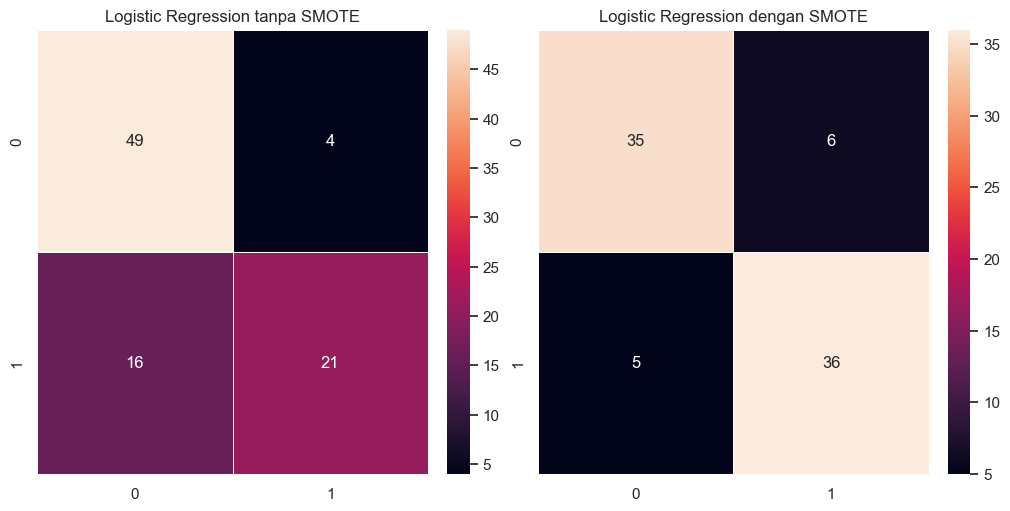

In [93]:
lrcm = confusion_matrix(y_test, y_pred_lr)
lrscm = confusion_matrix(ys_test, y_pred_lr_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(lrcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Logistic Regression tanpa SMOTE')
sns.heatmap(lrscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Logistic Regression dengan SMOTE')
plt.savefig("lrcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

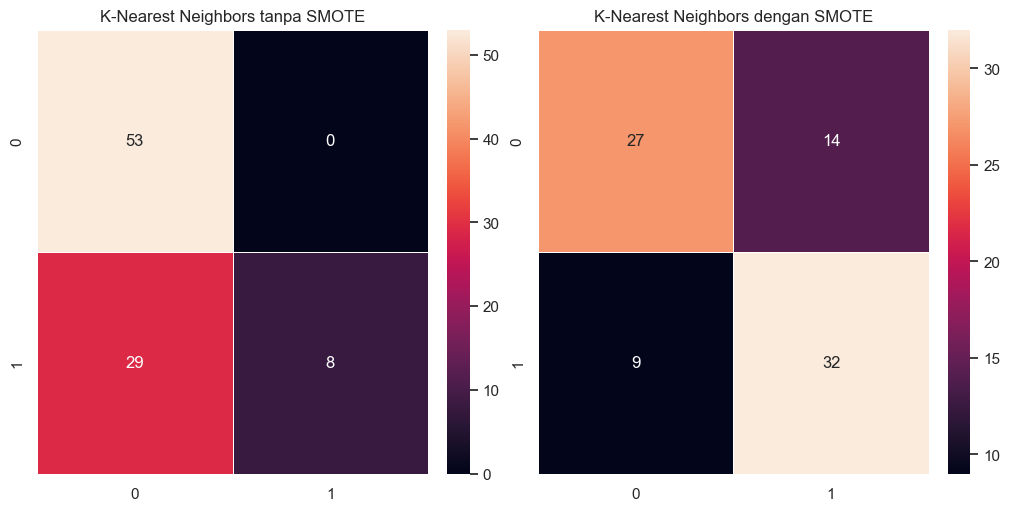

In [94]:
knncm = confusion_matrix(y_test, y_pred_knn)
knnscm = confusion_matrix(ys_test, y_pred_knn_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(knncm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('K-Nearest Neighbors tanpa SMOTE')
sns.heatmap(knnscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('K-Nearest Neighbors dengan SMOTE')
plt.savefig("knncm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

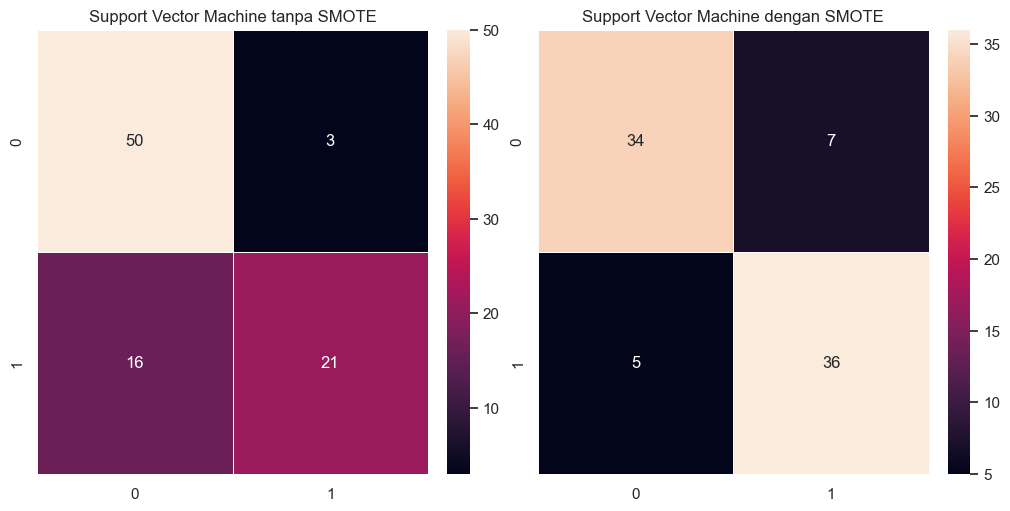

In [95]:
svmcm = confusion_matrix(y_test, y_pred_svm)
svmscm = confusion_matrix(ys_test, y_pred_svm_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(svmcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Support Vector Machine tanpa SMOTE')
sns.heatmap(svmscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Support Vector Machine dengan SMOTE')
plt.savefig("svmcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

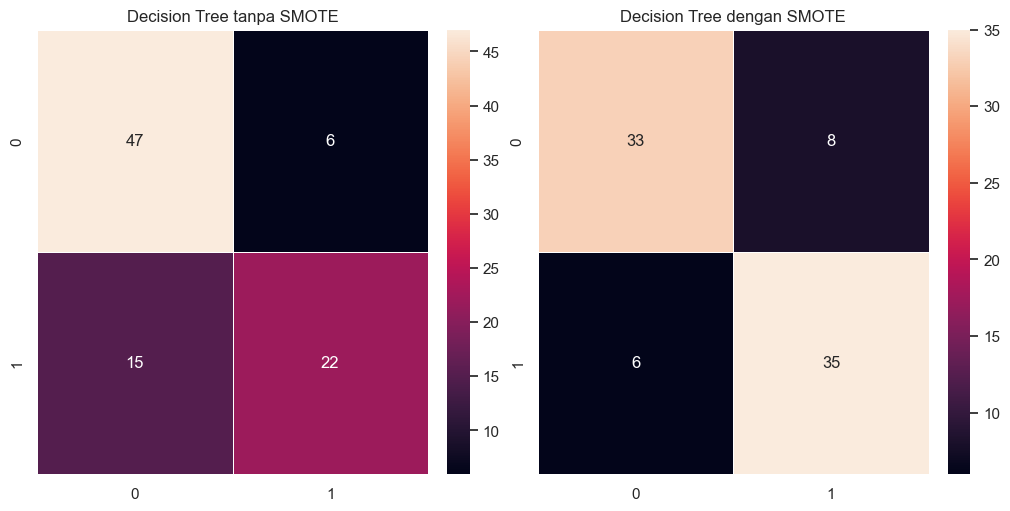

In [96]:
dtccm = confusion_matrix(y_test, y_pred_dtc)
dtcscm = confusion_matrix(ys_test, y_pred_dtc_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(dtccm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Decision Tree tanpa SMOTE')
sns.heatmap(dtcscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Decision Tree dengan SMOTE')
plt.savefig("dtccm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

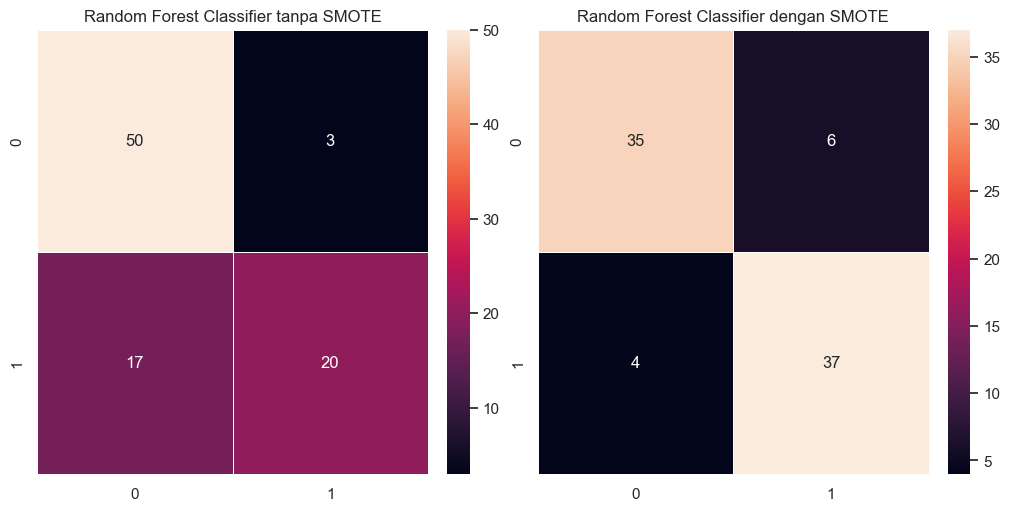

In [97]:
rfccm = confusion_matrix(y_test, y_pred_rfc)
rfcscm = confusion_matrix(ys_test, y_pred_rfc_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(rfccm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Random Forest Classifier tanpa SMOTE')
sns.heatmap(rfcscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Random Forest Classifier dengan SMOTE')
plt.savefig("rfccm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

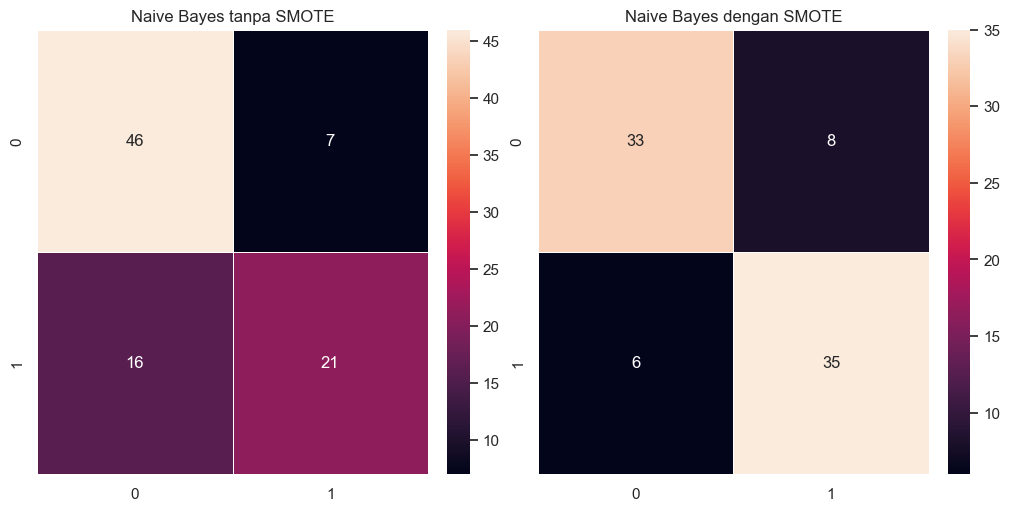

In [98]:
nbcm = confusion_matrix(y_test, y_pred_nb)
nbscm = confusion_matrix(ys_test, y_pred_nb_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(nbcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Naive Bayes tanpa SMOTE')
sns.heatmap(nbscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Naive Bayes dengan SMOTE')
plt.savefig("nbcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [99]:
def finding_max(list_pred,y_test,type_pred=None):
  predicted_value = []
  for index,pred in enumerate(list_pred):
    if(type_pred == 'accuracy'):
      predicted_value.append(accuracy_score(y_test,pred))
    elif(type_pred == 'recall'):
      predicted_value.append(recall_score(y_test,pred))
    elif(type_pred == 'precision'):
      predicted_value.append(precision_score(y_test,pred))
    elif(type_pred == 'f1'):
      predicted_value.append(f1_score(y_test,pred))
  return predicted_value.index(max(predicted_value)),max(predicted_value)

In [100]:
best_accuracy = finding_max(list_pred,y_test,'accuracy')
best_accuracy_s = finding_max(list_pred_s,ys_test,'accuracy')

best_recall = finding_max(list_pred,y_test,'recall')
best_recall_s = finding_max(list_pred_s,ys_test,'recall')

best_precision = finding_max(list_pred,y_test,'precision')
best_precision_s = finding_max(list_pred_s,ys_test,'precision')

best_f1 = finding_max(list_pred,y_test,'f1')
best_f1_s = finding_max(list_pred_s,ys_test,'f1')

print('====================================')
print('Model yang di-training tanpa SMOTE')
print('====================================')
print(f'Model yang memiliki Accuracy Score tinggi adalah {list_model[best_accuracy[0]]} dengan nilai accuracy Score {best_accuracy[1]}')
print(f'Model yang memiliki Precision Score tinggi adalah {list_model[best_precision[0]]} dengan nilai precision Score {best_precision[1]}')
print(f'Model yang memiliki Recall Score tinggi adalah {list_model[best_recall[0]]} dengan nilai recall Score {best_recall[1]}')
print(f'Model yang memiliki F1 Score tinggi adalah {list_model[best_f1[0]]} dengan nilai F1 Score {best_f1[1]}')
print('\n')
print('====================================')
print('Model yang di-training dengan SMOTE')
print('====================================')
print(f'Model yang memiliki Accuracy Score tinggi adalah {list_model[best_accuracy_s[0]]} dengan nilai accuracy Score {best_accuracy_s[1]}')
print(f'Model yang memiliki Precision Score tinggi adalah {list_model[best_precision_s[0]]} dengan nilai precision Score {best_precision_s[1]}')
print(f'Model yang memiliki Recall Score tinggi adalah {list_model[best_recall_s[0]]} dengan nilai recall Score {best_recall_s[1]}')
print(f'Model yang memiliki F1 Score tinggi adalah {list_model[best_f1_s[0]]} dengan nilai F1 Score {best_f1_s[1]}')

Model yang di-training tanpa SMOTE
Model yang memiliki Accuracy Score tinggi adalah Support Vector Machine dengan nilai accuracy Score 0.7888888888888889
Model yang memiliki Precision Score tinggi adalah K-Nearest Neighbors dengan nilai precision Score 1.0
Model yang memiliki Recall Score tinggi adalah Decision Tree dengan nilai recall Score 0.5945945945945946
Model yang memiliki F1 Score tinggi adalah Support Vector Machine dengan nilai F1 Score 0.6885245901639344


Model yang di-training dengan SMOTE
Model yang memiliki Accuracy Score tinggi adalah Random Forest Classifier dengan nilai accuracy Score 0.8780487804878049
Model yang memiliki Precision Score tinggi adalah Random Forest Classifier dengan nilai precision Score 0.8604651162790697
Model yang memiliki Recall Score tinggi adalah Random Forest Classifier dengan nilai recall Score 0.9024390243902439
Model yang memiliki F1 Score tinggi adalah Random Forest Classifier dengan nilai F1 Score 0.8809523809523809


In [101]:
df_pred.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582.00,0,20.0,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.1,136,1,0,6,1


In [102]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    float64
 5   hypertension              299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 30.5 KB


# J. MODEL INFERENCE
-------------------------------------


In [103]:
model_inference = {
    'age':[67, 44, 75, 35, 63, 51, 40, 53, 30, 46], 
    'anaemia':[0, 1, 1, 0, 0, 0, 1, 0, 1, 0], 
    'creatinine_phosphokinase':[61, 500, 200, 307, 201, 195, 704, 459, 1200, 999],
    'diabetes':[1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    'ejection_fraction':[45, 30, 20, 38, 40, 21, 33, 60, 67, 56],
    'hypertension':[0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    'platelets':[400000, 510000, 230000, 123000, 323000, 564000, 159000, 444000, 555000, 395000],
    'serum_creatinine':[0.50, 1.60, 1.90, 2.25, 2.50, 3.00, 1.80, 2.00, 2.70, 2.95],
    'sex':[1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    'smoking':[0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
    'time':[285, 23, 100, 195, 200, 300, 78, 91, 125, 250],
    'death':[0, 0, 0, 1, 1, 0, 1, 0, 0, 1]}

dt_trial = pd.DataFrame(model_inference)
dt_trial

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,sex,smoking,time,death
0,67,0,61,1,45,0,400000,0.50,1,0,285,0
1,44,1,500,0,30,1,510000,1.60,1,0,23,0
2,75,1,200,0,20,0,230000,1.90,0,1,100,0
3,35,0,307,1,38,1,123000,2.25,1,1,195,1
4,63,0,201,1,40,0,323000,2.50,0,1,200,1
5,51,0,195,0,21,0,564000,3.00,0,0,300,0
6,40,1,704,0,33,0,159000,1.80,0,0,78,1
7,53,0,459,0,60,1,444000,2.00,1,0,91,0
8,30,1,1200,0,67,1,555000,2.70,1,1,125,0
9,46,0,999,1,56,0,395000,2.95,0,0,250,1


In [104]:
dt_trial = scaler.fit_transform(dt_trial)

In [105]:
pred_lr_minf = lr_model.predict(dt_trial)
pred_lr_s_minf = lr_model_s.predict(dt_trial)
pred_knn_minf = knn_model.predict(dt_trial)
pred_knn_s_minf = knn_model_s.predict(dt_trial)
pred_svm_minf = svm_model.predict(dt_trial)
pred_svm_s_minf = svm_model_s.predict(dt_trial)
pred_dtc_minf = dtc_model.predict(dt_trial)
pred_dtc_s_minf = dtc_model_s.predict(dt_trial)
pred_rfc_minf = rfc_model.predict(dt_trial)
pred_rfc_s_minf = rfc_model_s.predict(dt_trial)
pred_nb_minf = nb_model.predict(dt_trial)
pred_nb_s_minf = nb_model_s.predict(dt_trial)

print("Logistic Regression Model = ", pred_lr_minf)
print("Logistic Regression Model SMOTE = ", pred_lr_s_minf)
print("K-Nearest Neighbors Model = ", pred_knn_minf)
print("K-Nearest Neighbors Model SMOTE = ", pred_knn_s_minf)
print("Support Virtual Machine Model = ", pred_svm_minf)
print("Support Virtual Machine Model SMOTE = ", pred_svm_s_minf)
print("Decision Tree Model = ", pred_dtc_minf)
print("Decision Tree Model SMOTE = ", pred_dtc_s_minf)
print("Random Forest Model = ", pred_rfc_minf)
print("Random Forest Model SMOTE = ", pred_rfc_s_minf)
print("Naive Bayes Model = ", pred_nb_minf)
print("Naive Bayes Model SMOTE = ", pred_nb_s_minf)

Logistic Regression Model =  [0 0 1 0 0 1 0 0 0 0]
Logistic Regression Model SMOTE =  [0 1 1 0 0 1 0 0 0 0]
K-Nearest Neighbors Model =  [0 0 1 0 0 1 0 0 0 0]
K-Nearest Neighbors Model SMOTE =  [0 1 1 0 1 1 0 0 0 0]
Support Virtual Machine Model =  [0 0 1 0 0 1 0 0 0 0]
Support Virtual Machine Model SMOTE =  [0 1 1 0 0 1 0 0 0 0]
Decision Tree Model =  [0 1 1 0 0 1 0 1 1 1]
Decision Tree Model SMOTE =  [1 1 1 0 0 1 0 1 1 0]
Random Forest Model =  [0 0 1 0 0 1 0 0 0 0]
Random Forest Model SMOTE =  [1 1 1 0 0 1 0 1 1 0]
Naive Bayes Model =  [0 0 1 0 0 1 0 0 0 0]
Naive Bayes Model SMOTE =  [0 1 1 0 0 1 0 0 0 0]


# K. Pengambilan Kesimpulan
-----------------------------------------------------
Pada final project ini dilakukan pemodelan menggunakan **Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes** untuk memprediksi keselamatan pasien dari penyakit jantung. Berdasarkan data target (death) ternyata terjadi ketidak seimbangan data tersebut atau disebut dengan imbalanced data, sehingga dilakukan percobaan model dengan data yang di atasi imbalancednya dan dengan data yang tanpa di atasi permasalahan imbalancednya. Setelah dilakukan training dan evaluasi model, didapatkan hasil:

=========================================================
-----------------------------------------------------
**`F1 SCORE`**
-----------------------------------------------------
F1 score dari model Logistic Regression tanpa SMOTE adalah 0.6774193548387097
F1 score dari model Logistic Regression dengan SMOTE adalah 0.8505747126436782

F1 score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.35555555555555557
F1 score dari model K-Nearest Neighbors dengan SMOTE adalah 0.8

F1 score dari model Support Vector Machine tanpa SMOTE adalah 0.6885245901639344
F1 score dari model Support Vector Machine dengan SMOTE adalah 0.8604651162790697

F1 score dari model Decision Tree tanpa SMOTE adalah 0.676923076923077
F1 score dari model Decision Tree dengan SMOTE adalah 0.7901234567901235

F1 score dari model Random Forest Classifier tanpa SMOTE adalah 0.6875
F1 score dari model Random Forest Classifier dengan SMOTE adalah 0.8674698795180722

F1 score dari model Naive Bayes tanpa SMOTE adalah 0.6461538461538462
F1 score dari model Naive Bayes dengan SMOTE adalah 0.8505747126436782

=========================================================
---------------------------------------------------------
**``RECALL``**
---------------------------------------------------------
Recall score dari model Logistic Regression tanpa SMOTE adalah 0.5675675675675675
Recall score dari model Logistic Regression dengan SMOTE adalah 0.9024390243902439

Recall score dari model K-Nearest Neighbors tanpa SMOTE adalah 0.21621621621621623
Recall score dari model K-Nearest Neighbors dengan SMOTE adalah 0.7804878048780488

Recall score dari model Support Vector Machine tanpa SMOTE adalah 0.5675675675675675
Recall score dari model Support Vector Machine dengan SMOTE adalah 0.9024390243902439

Recall score dari model Decision Tree tanpa SMOTE adalah 0.5945945945945946
Recall score dari model Decision Tree dengan SMOTE adalah 0.7804878048780488

Recall score dari model Random Forest Classifier tanpa SMOTE adalah 0.5945945945945946
Recall score dari model Random Forest Classifier dengan SMOTE adalah 0.8780487804878049

Recall score dari model Naive Bayes tanpa SMOTE adalah 0.5675675675675675
Recall score dari model Naive Bayes dengan SMOTE adalah 0.9024390243902439

=========================================================
---------------------------------------------------------
**``PRECISION``**
---------------------------------------------------------
Precision score dari model Logistic Regression tanpa SMOTE adalah 0.84
Precision score dari model Logistic Regression dengan SMOTE adalah 0.8043478260869565

Precision score dari model K-Nearest Neighbors tanpa SMOTE adalah 1.0
Precision score dari model K-Nearest Neighbors dengan SMOTE adalah 0.8205128205128205

Precision score dari model Support Vector Machine tanpa SMOTE adalah 0.875
Precision score dari model Support Vector Machine dengan SMOTE adalah 0.8222222222222222

Precision score dari model Decision Tree tanpa SMOTE adalah 0.7857142857142857
Precision score dari model Decision Tree dengan SMOTE adalah 0.8

Precision score dari model Random Forest Classifier tanpa SMOTE adalah 0.8148148148148148
Precision score dari model Random Forest Classifier dengan SMOTE adalah 0.8571428571428571

Precision score dari model Naive Bayes tanpa SMOTE adalah 0.75
Precision score dari model Naive Bayes dengan SMOTE adalah 0.8043478260869565

=========================================================
---------------------------------------------------------

---------------------------------------------------------
a). Model yang di-training tanpa SMOTE

Model yang memiliki Accuracy Score tinggi adalah Support Vector Machine dengan nilai accuracy Score 0.7888888888888889
Model yang memiliki Precision Score tinggi adalah K-Nearest Neighbors dengan nilai precision Score 1.0
Model yang memiliki Recall Score tinggi adalah Decision Tree dengan nilai recall Score 0.5945945945945946
Model yang memiliki F1 Score tinggi adalah Support Vector Machine dengan nilai F1 Score 0.6885245901639344


b). Model yang di-training dengan SMOTE

Model yang memiliki Accuracy Score tinggi adalah Random Forest Classifier dengan nilai accuracy Score 0.8658536585365854
Model yang memiliki Precision Score tinggi adalah Random Forest Classifier dengan nilai precision Score 0.8571428571428571
Model yang memiliki Recall Score tinggi adalah Logistic Regression dengan nilai recall Score 0.9024390243902439
Model yang memiliki F1 Score tinggi adalah Random Forest Classifier dengan nilai F1 Score 0.8674698795180722

-----------------------------------------------------

Berdasarkan hasil tersebut, dapat disimpulkan bahwa:
- Dari ke 6 model yang dibuat ternyata model Random Forest Classifier merupakan model terbaik dengan diatasi terlebih dahulu permasalahan data imbalanced (keseimbangan data) nya. Karen jika melihat berdasarkan nilai acuracy score nya akan lebih efektif jika data seimbang.

-----------------------------------------------------

Hasil yang didapatkan dari Model Inference Setelah membuat data sendiri dan diklasifikasi menggunalan 6 model, maka didapatkan hasil prediksi seperti berikut:
- Logistic Regression Model =  [0 0 1 0 0 1 0 0 0 0]
- Logistic Regression Model SMOTE =  [0 1 1 0 0 1 0 0 0 0]
- K-Nearest Neighbors Model =  [0 0 1 0 0 1 0 0 0 0]
- K-Nearest Neighbors Model SMOTE =  [0 1 1 0 0 1 0 0 0 0]
- Support Virtual Machine Model =  [0 0 1 0 0 1 0 0 0 0]
- Support Virtual Machine Model SMOTE =  [0 1 1 0 0 1 0 0 1 0]
- Decision Tree Model =  [0 1 1 0 0 1 0 1 1 1]
- Decision Tree Model SMOTE =  [1 1 1 0 0 1 0 1 1 0]
- Random Forest Model =  [0 0 1 0 0 1 0 0 0 0]
- Random Forest Model SMOTE =  [1 1 1 0 0 1 0 1 1 0]
- Naive Bayes Model =  [0 0 1 0 0 1 0 0 0 0]
- Naive Bayes Model SMOTE =  [0 1 1 0 0 1 0 0 0 0]

-----------------------------------------------------